**<h2 style = "color : Indigo"> Leanding club case study </h2>**

In this case study we will be applying concepts learnt as part of EDA and apply on Lending Club Case Study and we will also develop 
a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of 
losing money while lending to customers.

**Problem Statement**

The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to 
identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying 
the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

**When a person applies for a loan, there are two types of decisions that could be taken by the company:**

- **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

- **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

- **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [588]:
# Importing importent libraries which we use in solving the case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [589]:
# Reading data from the given CSV file using pandas
df = pd.read_csv(r"C:\Users\shama\Downloads\loan\loan.csv")

Display top few records to get an understanding on the data we are working on

In [591]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


From the above step we are looking at lot of null columns, which needs to be removed.

In [593]:
# Below code helps us get the % of null values in each columns from the data frame
100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

Let us try to find the list of columns which is having null values and later remove 100% null value columns

In [595]:
null_columns = df.isnull().all()
null_columns_list = null_columns[null_columns].index.tolist()
print("Shape of the dataset ", df.shape)
print(null_columns_list)
print(f"Total columns having null is ",len(null_columns_list))

Shape of the dataset  (39717, 111)
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'tota

Since we have 54 columns with Null values out of 111, let us remove columns with 100% null values.

In [597]:
df_cleaned  = df.dropna(axis=1, how='all')
df_cleaned.shape

(39717, 57)

In [598]:
# Check null columns again
100*df_cleaned.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


After dropping all the columns having 100% null values, we still see multiple columns having null values. 
Let us analyse them 
* mths_since_last_delinq : Is having 64% null values, we will drop this.
* mths_since_last_record : Is having 92% null values, we will drop this.
* next_pymnt_d           : Is having 97% null values, we will drop this.
* desc                   :Desc is having short description from borrwer let us remove this too, since we can keep purpose or title instead of this.

In [600]:
columns_list_withna = ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc']
df_cleaned2 = df_cleaned.drop(columns=columns_list_withna)
print(df_cleaned2.shape)

(39717, 53)


We notice the size of the column came down from 111 to 54, after dropping columns with high threshod of null values.
Now let us check we we have any rows with 50% null values and drop them

In [602]:
# Example: Drop rows with more than 50% NaN values
threshold = 50
df_cleaned3 = df_cleaned2.dropna(axis=0, thresh=threshold)
print("Threshold",threshold)
print("DataFrame shape after cleaning rows with threshod ",df_cleaned3.shape)

Threshold 50
DataFrame shape after cleaning rows with threshod  (39676, 53)


We notice after We don't have any rows having more than 50% null values, now let us check once again if we can remove any unwanted columns.

In [604]:
df_cleaned3.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


We can see from top 50 rows returned that we have few columns having 0.00 or 1, like acc_now_delinq, chargeoff_within_12_mths and more
Let us try to find the unique elements in each columns and drop the ones which are having so unique columns since it won't be helpful

In [606]:
# Find unique values in each columns
print(df_cleaned3.nunique().sort_values())
print(df_cleaned3['term'])

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          54
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              103
int_rate                    

We see multiple columns with unique values 1 now let us try to remove them.

In [608]:
cl_no_unique_values = df_cleaned3.columns[df_cleaned3.nunique() == 1]
print(cl_no_unique_values)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [609]:
df_loan_leandingcase= df_cleaned3.drop(columns=cl_no_unique_values)

In [610]:
df_loan_leandingcase.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Now let us look at the excel with the description and delete the columns which are not required
- pub_rec_bankruptcies is having 0.00 and NA as values let us remove this
- Employee title is having unique values we will remove this since it will be difficult to perform analyses on this
- url is not required
- Remove title since we have sub title which we can use as a categorical data type
- Similarly let us remove few other columns which are not required for our analyses

In [612]:
columns_drop2= ['url','emp_title','member_id','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies','title']
df_loan_leandingcase2=df_loan_leandingcase.drop(columns=columns_drop2)
df_loan_leandingcase2.shape

(39676, 19)

Summary of data cleaning 
- We 1st removed all the columns with 100% null values
- Later we removed columns which had significantaly high threashold of null values like 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d'
- Later we made a check to understand if we still have any null columns having more than 50% null
- We later checked if any rows are having null values by 100%
- We understood we have few non unique columns and we dropped them too
- Finally by looking at the description provided we removed columns that are not required for our analyses.

    After completing data cleaning, now we will look into data type of each column and convert into required type before working on analysing the dataset

In [614]:
# Fecthing the data type of each column
df_loan_leandingcase2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39676 entries, 0 to 39684
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39676 non-null  int64  
 1   loan_amnt            39676 non-null  int64  
 2   funded_amnt          39676 non-null  int64  
 3   funded_amnt_inv      39676 non-null  float64
 4   term                 39676 non-null  object 
 5   int_rate             39676 non-null  object 
 6   installment          39676 non-null  float64
 7   grade                39676 non-null  object 
 8   sub_grade            39676 non-null  object 
 9   emp_length           38601 non-null  object 
 10  home_ownership       39676 non-null  object 
 11  annual_inc           39676 non-null  float64
 12  verification_status  39676 non-null  object 
 13  issue_d              39676 non-null  object 
 14  loan_status          39676 non-null  object 
 15  purpose              39676 non-null  obje

In [615]:
# We still see emp_lenght and title with null values, but its threshold is small emp_lenght with 2.7% and title with 0.027%
df_loan_leandingcase2.isnull().mean() *100

id                     0.000000
loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.709447
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

In [616]:
# let us replace null values in emp_length with median since it gives us the middle value, 1st convert emp_lenght to int
# Function to extract numbers from a string
# df_loan_leandingcase2['emp_length'] = df_loan_leandingcase2['emp_length'].astype(str)
# def extract_numbers(s):
#     # Find all numbers in the string using regular expressions
#     numbers = re.findall(r'\d+', s)
#     # Join the numbers into a single string or convert to a list of integers
#     return ' '.join(numbers)

# # Apply the function to the DataFrame column
# df_loan_leandingcase2['emp_length'] = df_loan_leandingcase2['emp_length'].apply(extract_numbers)
# df_loan_leandingcase2['emp_length'] = df_loan_leandingcase2['emp_length'].astype(int)


In [617]:
# Let us find the unique values in emp lenght
print(df_loan_leandingcase2['emp_length'].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [618]:
#  We notice we have a null value lets replace this null obj with next column values
df_loan_leandingcase2['emp_length'] = df_loan_leandingcase2['emp_length'].fillna(method='bfill').astype(str)
print(df_loan_leandingcase2['emp_length'].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']


Data conversions: We should convert columns to right data type before starting with the analysis

In [620]:
df_loan_leandingcase2.info()

df_loan_leandingcase2.shape

<class 'pandas.core.frame.DataFrame'>
Index: 39676 entries, 0 to 39684
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39676 non-null  int64  
 1   loan_amnt            39676 non-null  int64  
 2   funded_amnt          39676 non-null  int64  
 3   funded_amnt_inv      39676 non-null  float64
 4   term                 39676 non-null  object 
 5   int_rate             39676 non-null  object 
 6   installment          39676 non-null  float64
 7   grade                39676 non-null  object 
 8   sub_grade            39676 non-null  object 
 9   emp_length           39676 non-null  object 
 10  home_ownership       39676 non-null  object 
 11  annual_inc           39676 non-null  float64
 12  verification_status  39676 non-null  object 
 13  issue_d              39676 non-null  object 
 14  loan_status          39676 non-null  object 
 15  purpose              39676 non-null  obje

(39676, 19)

In [621]:
# convert issue_d to date type, firstly convert from float 64 to string
df_loan_leandingcase2['issue_d'] = df_loan_leandingcase2['issue_d'].astype(str)
# Convert the string dates to datetime type
df_loan_leandingcase2['issue_d'] = pd.to_datetime(df_loan_leandingcase2['issue_d'], format='%b-%y')

In [622]:
df_loan_leandingcase2['issue_d'] = df_loan_leandingcase2['issue_d'].dt.strftime('%Y-%m')

In [623]:
df_loan_leandingcase2['issue_d'].value_counts()

issue_d
2011-12    2260
2011-11    2223
2011-10    2114
2011-09    2063
2011-08    1928
2011-07    1870
2011-06    1827
2011-05    1689
2011-04    1562
2011-03    1443
2011-01    1380
2011-02    1297
2010-12    1267
2010-10    1132
2010-11    1121
2010-07    1119
2010-09    1086
2010-08    1078
2010-06    1029
2010-05     920
2010-04     827
2010-03     737
2010-02     627
2009-11     602
2009-12     598
2010-01     589
2009-10     545
2009-09     449
2009-08     408
2009-07     374
2009-06     356
2009-05     319
2009-04     290
2009-03     276
2009-02     260
2009-01     239
2008-03     236
2008-12     223
2008-11     184
2008-02     174
2008-01     171
2008-04     155
2008-10      96
2007-12      85
2008-07      83
2008-05      71
2008-08      71
2008-06      66
2007-10      47
2007-11      37
2008-09      32
2007-08      23
2007-09      16
2007-07       2
Name: count, dtype: int64

Now create two more derived columns with year and month

In [625]:
df_loan_leandingcase2[['issue_year', 'issue_month']] = df_loan_leandingcase2['issue_d'].str.split('-', expand=True)
df_loan_leandingcase2['issue_month'] = df_loan_leandingcase2['issue_month'].astype(int)

In [626]:
df_loan_leandingcase2['issue_year'] = df_loan_leandingcase2['issue_year'].astype(str)

In [627]:
df_loan_leandingcase2['issue_year'].value_counts()
df_loan_leandingcase2['issue_month'].value_counts()

issue_month
12    4433
11    4167
10    3934
9     3646
8     3508
7     3448
6     3278
5     2999
4     2834
3     2692
1     2379
2     2358
Name: count, dtype: int64

In [628]:
# Create a new column for Interest rate without the %age value
df_loan_leandingcase2['interest_rate'] = df_loan_leandingcase2['int_rate'].str.rstrip('%').astype(float)

In [629]:
df_loan_leandingcase2['interest_rate'].value_counts()

interest_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [630]:
df_loan_leandingcase2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39676 entries, 0 to 39684
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39676 non-null  int64  
 1   loan_amnt            39676 non-null  int64  
 2   funded_amnt          39676 non-null  int64  
 3   funded_amnt_inv      39676 non-null  float64
 4   term                 39676 non-null  object 
 5   int_rate             39676 non-null  object 
 6   installment          39676 non-null  float64
 7   grade                39676 non-null  object 
 8   sub_grade            39676 non-null  object 
 9   emp_length           39676 non-null  object 
 10  home_ownership       39676 non-null  object 
 11  annual_inc           39676 non-null  float64
 12  verification_status  39676 non-null  object 
 13  issue_d              39676 non-null  object 
 14  loan_status          39676 non-null  object 
 15  purpose              39676 non-null  obje

In [631]:
df_loan_leandingcase2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,issue_year,issue_month,interest_rate
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Verified,2011-12,Fully Paid,credit_card,860xx,AZ,27.65,2011,12,10.65
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Source Verified,2011-12,Charged Off,car,309xx,GA,1.00,2011,12,15.27
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Not Verified,2011-12,Fully Paid,small_business,606xx,IL,8.72,2011,12,15.96
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Source Verified,2011-12,Fully Paid,other,917xx,CA,20.00,2011,12,13.49
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,Source Verified,2011-12,Current,other,972xx,OR,17.94,2011,12,12.69


Segerate columns into Numeric, Categorical and extra for better analysis

In [633]:
df_loan_leandingcase_num = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','interest_rate']
df_loan_leandingcasecategorical_columns=['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state','issue_month',"issue_year"]
df_loan_leandingcaseextra_columns=['id','int_rate','zip_code']

**<h3 style = "color : Yellow"> Univeraint analysis </h3>**
- For Numeric data we will use histogram and box plot in our analysis
- For Categorical data we will use count plot

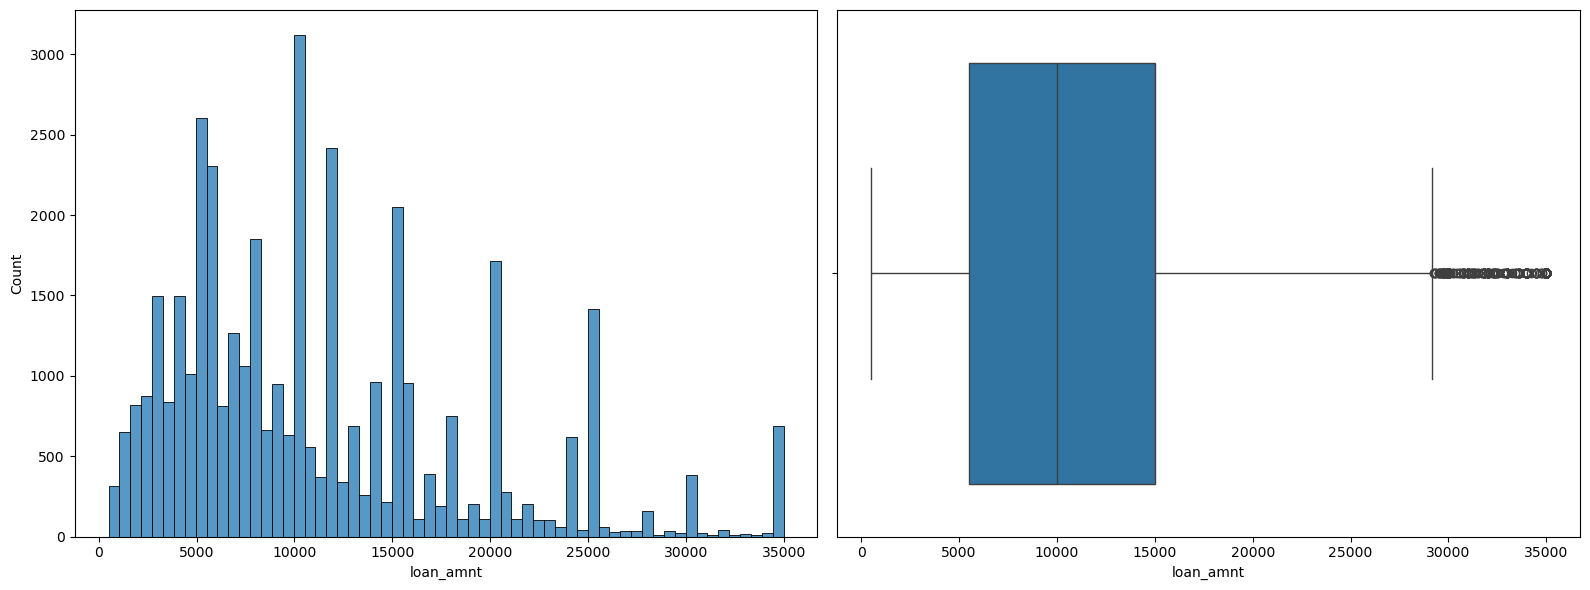

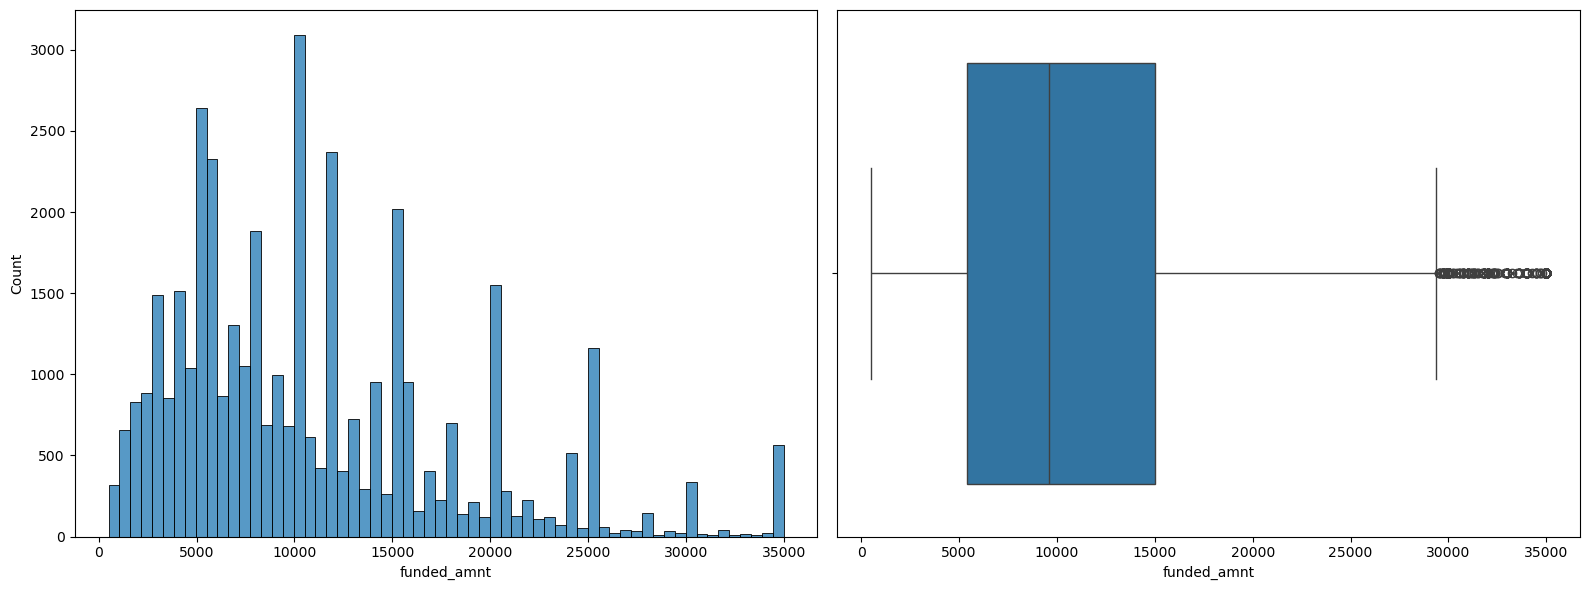

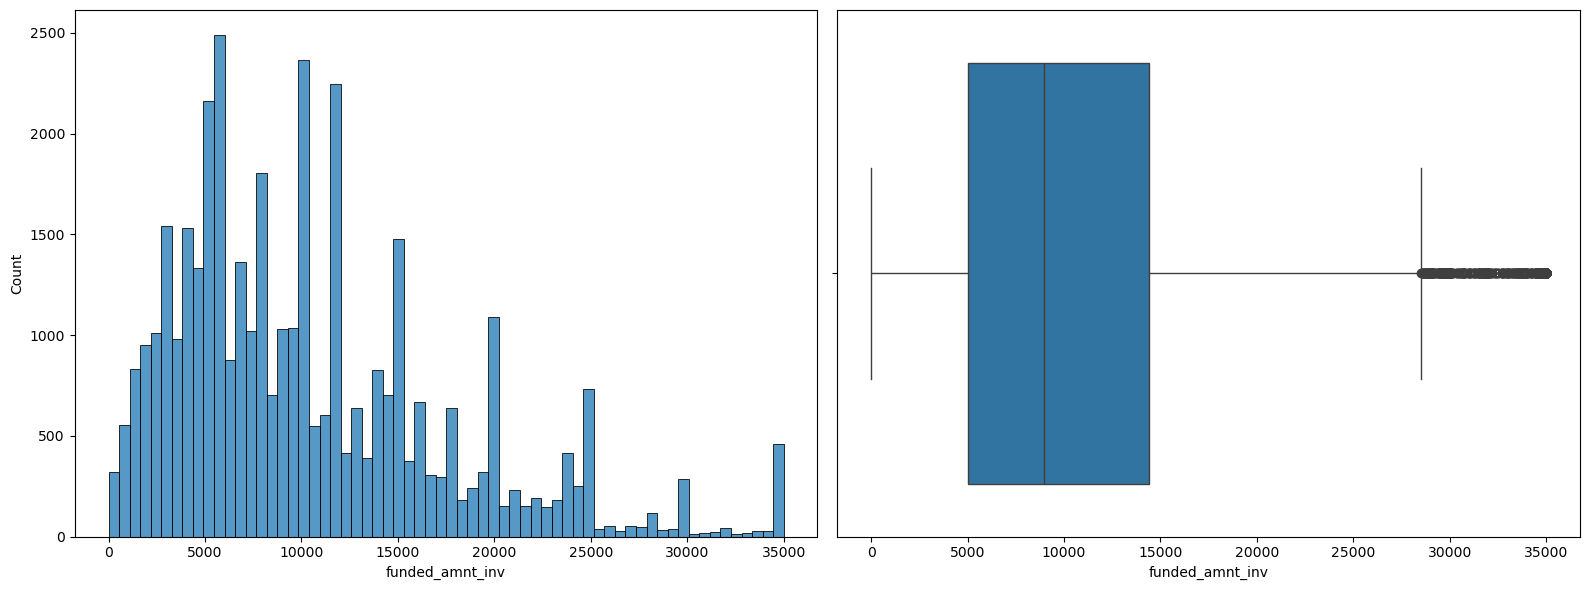

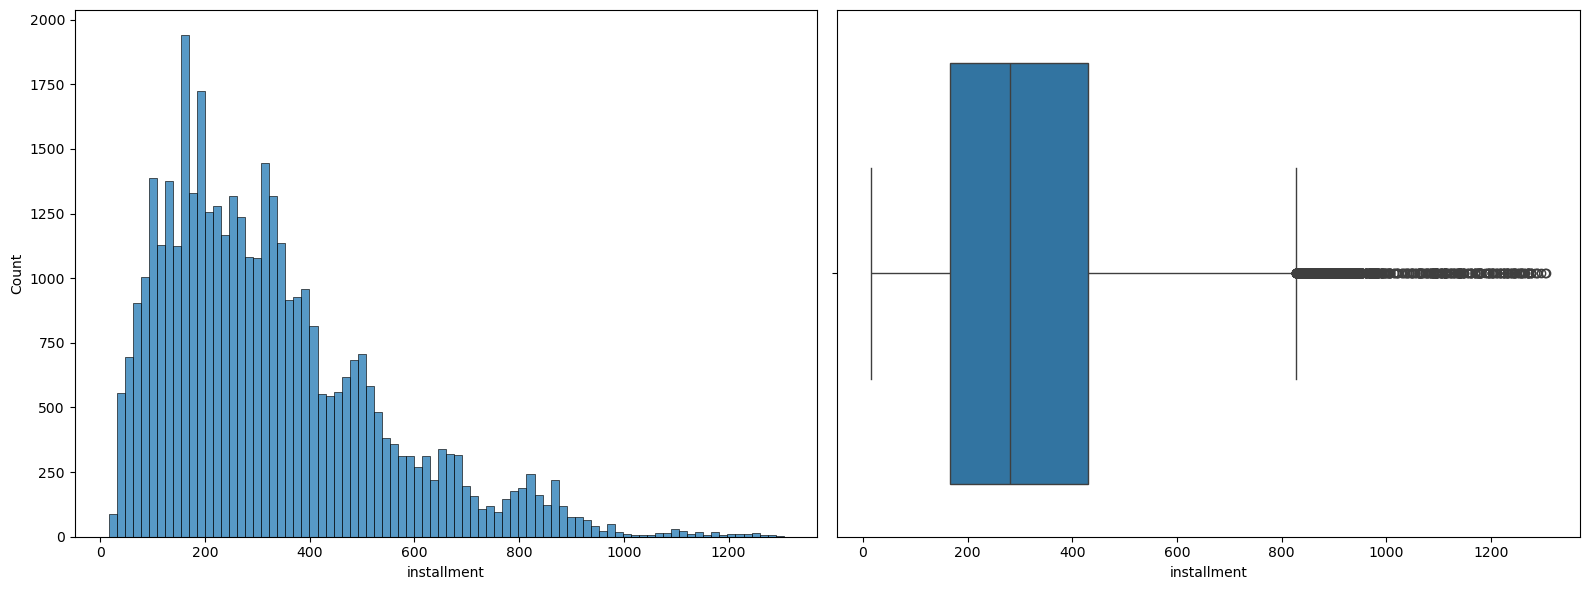

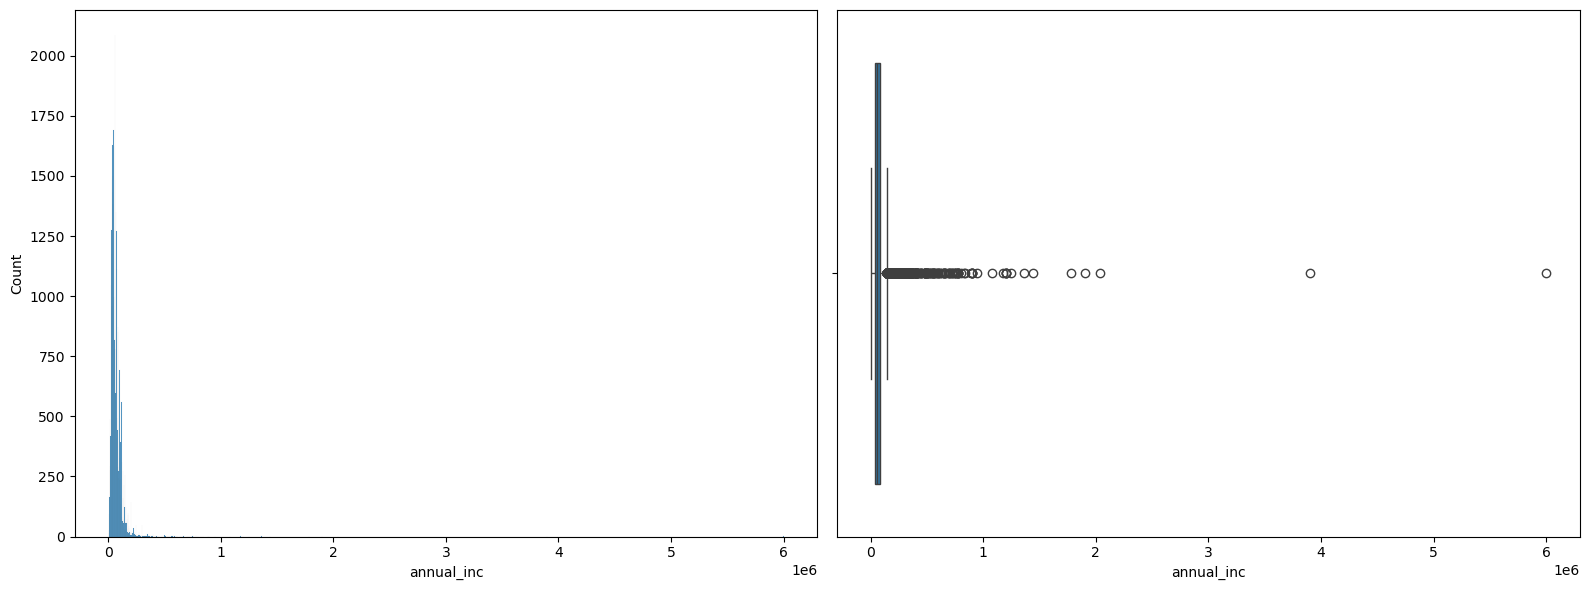

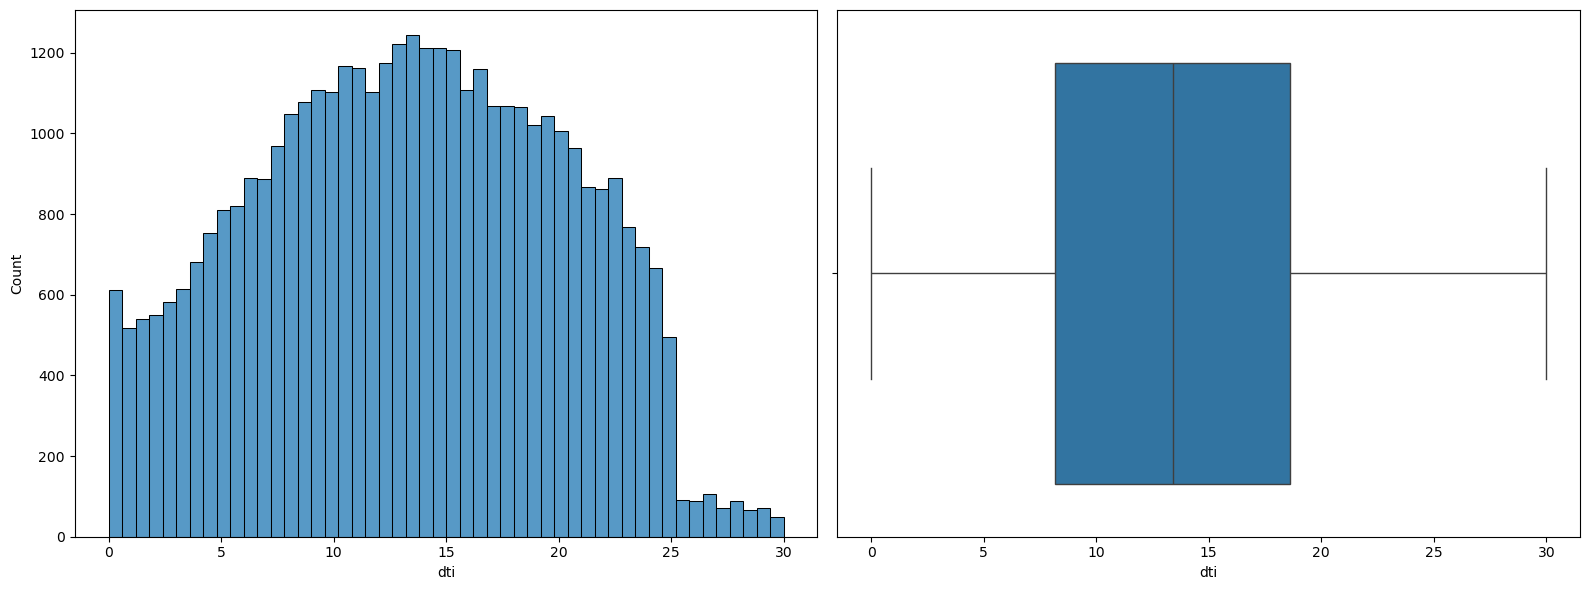

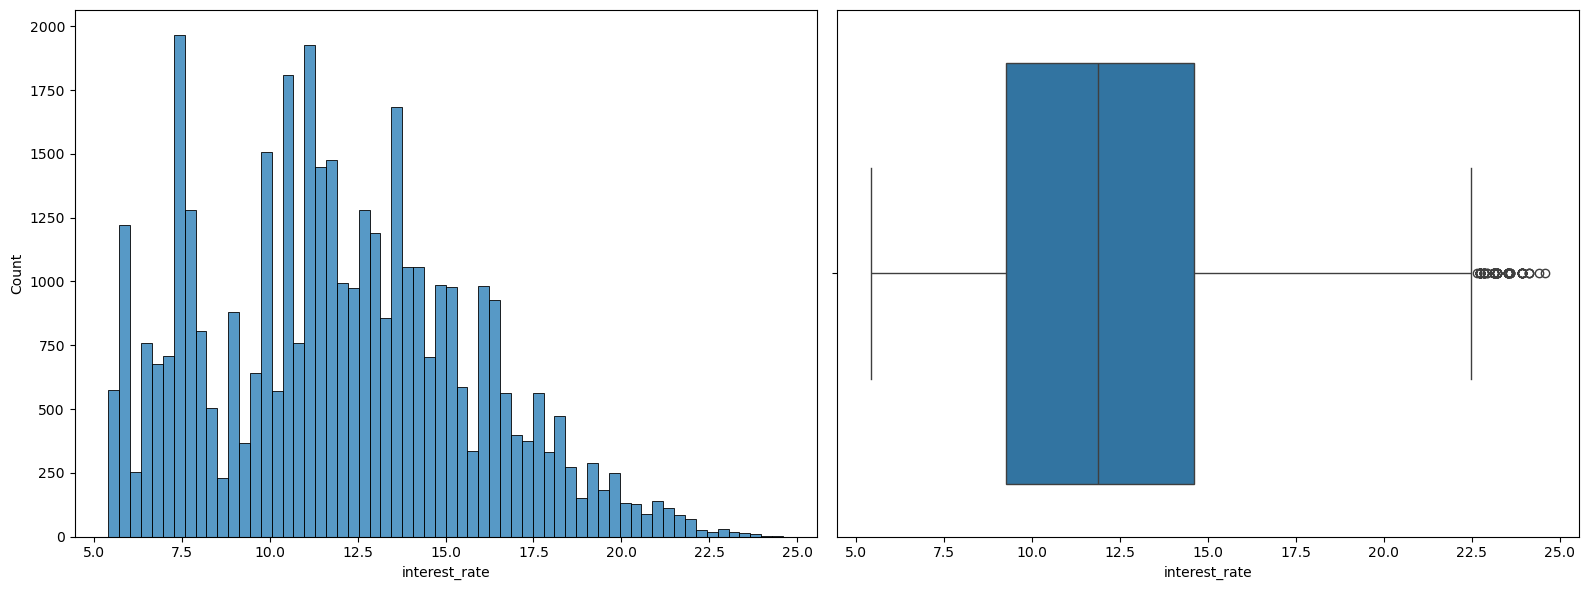

In [635]:
for col in df_loan_leandingcase_num:
    fig, p = plt.subplots(1,2, figsize=(16, 6))
    sns.histplot(x=df_loan_leandingcase2[col],ax=p[0])
    sns.boxplot(x=df_loan_leandingcase2[col],ax=p[1])
    plt.tight_layout()
    plt.show()

annual_inc we see lot of outliers and our analysis is not useful from the above graph. We will remove outliers to that we can get a clear picture

In [637]:
df_loan_leandingcase2["annual_inc"].describe()

count    3.967600e+04
mean     6.894734e+04
std      6.379374e+04
min      4.000000e+03
25%      4.040300e+04
50%      5.900000e+04
75%      8.216250e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

We see the value is extreme to read and understand, by assuming we are working for India clinet we will convert the annual_inc into thousands unit

In [639]:
df_loan_leandingcase2["annual_inc"] = df_loan_leandingcase2["annual_inc"]/1000
df_loan_leandingcase2["annual_inc"].describe()

count    39676.000000
mean        68.947343
std         63.793735
min          4.000000
25%         40.403000
50%         59.000000
75%         82.162500
max       6000.000000
Name: annual_inc, dtype: float64

count    37774.000000
mean        61.207737
std         28.005194
min          4.000000
25%         40.000000
50%         56.004000
75%         78.000000
max        144.600000
Name: annual_inc, dtype: float64


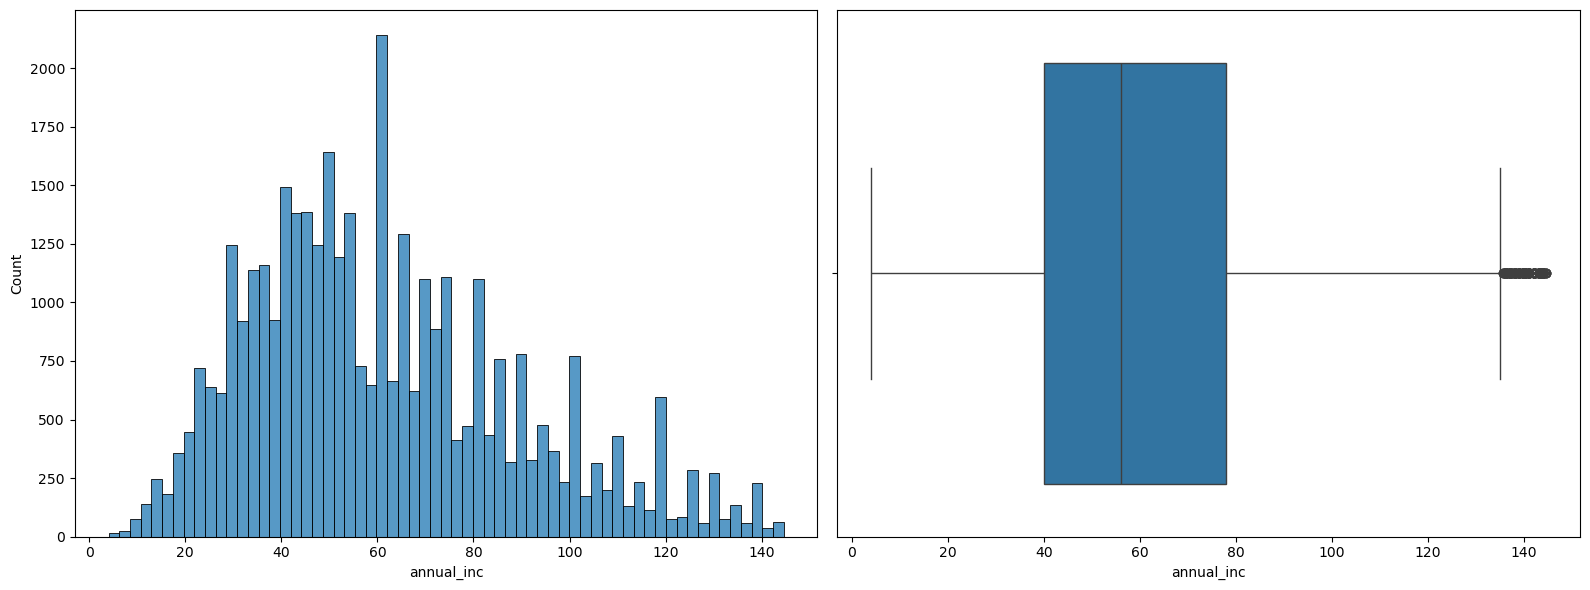

In [640]:
# Let us plot hist and box plot to understand outliers

# Calculate Q1, Q3, and IQR
Q1 = df_loan_leandingcase2["annual_inc"].quantile(0.25)
Q3 = df_loan_leandingcase2["annual_inc"].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df_loan_leandingcase2[(df_loan_leandingcase2['annual_inc'] >= lower_bound) & (df_loan_leandingcase2['annual_inc'] <= upper_bound)]

print(df_filtered['annual_inc'].describe())
fig, p = plt.subplots(1,2, figsize=(16, 6))
sns.histplot(x=df_filtered['annual_inc'],ax=p[0])
sns.boxplot(x=df_filtered['annual_inc'],ax=p[1])
plt.tight_layout()
plt.show()

**<h3 style = "color : Yellow"> Univeraint analysis summary for numeric columns</h3>**

- loan_amnt, funded_amnt and funded_amnt_inv are almost similar and the 50% falls at 10,000, there are outliers above 30000
  Which tells us that borrowers requested amount pattren is same as funded.
- Majority of installment for borrowers is coming around 200-400
- annual_inc had too many outliers after reploting by removing outliers we see 50% is falling under 56k and max annual_inc lies between 40 to 75k
- We have intresting observation for year and monhts, the distribution is increasing gradually for months and aswell for year.
- Maximum borrowers are paying interest rates in between 10-15%
- Maximum dti lies in the range 10-20

**<h3 style = "color : Yellow"> Univeraint analysis for categorical columns</h3>**

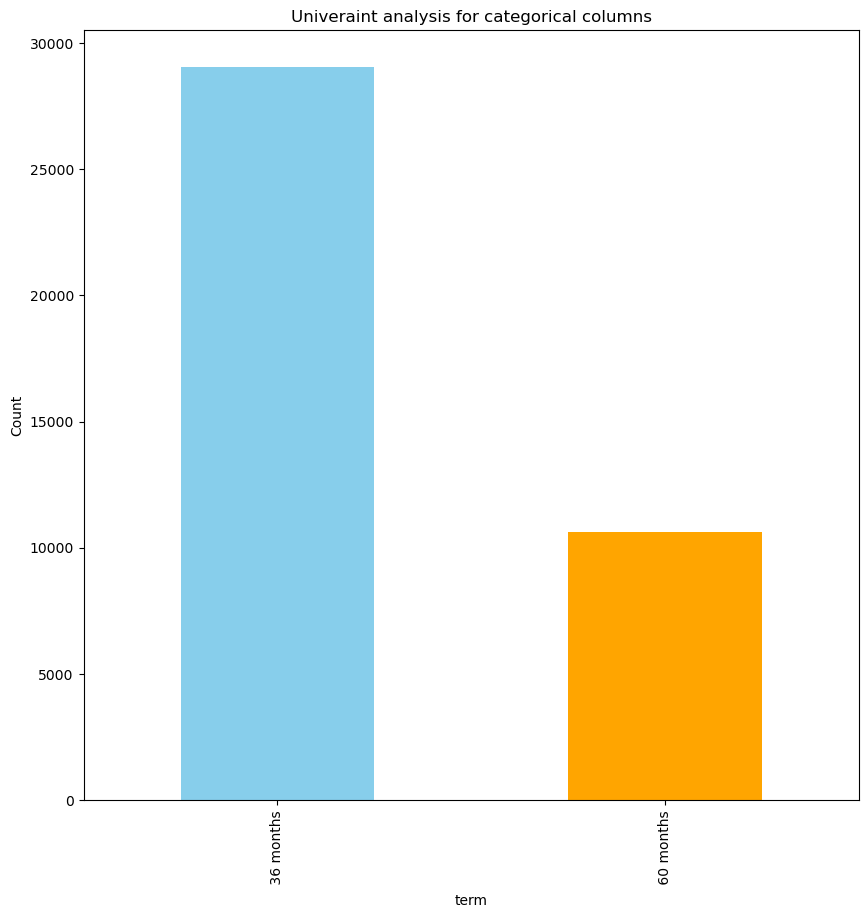

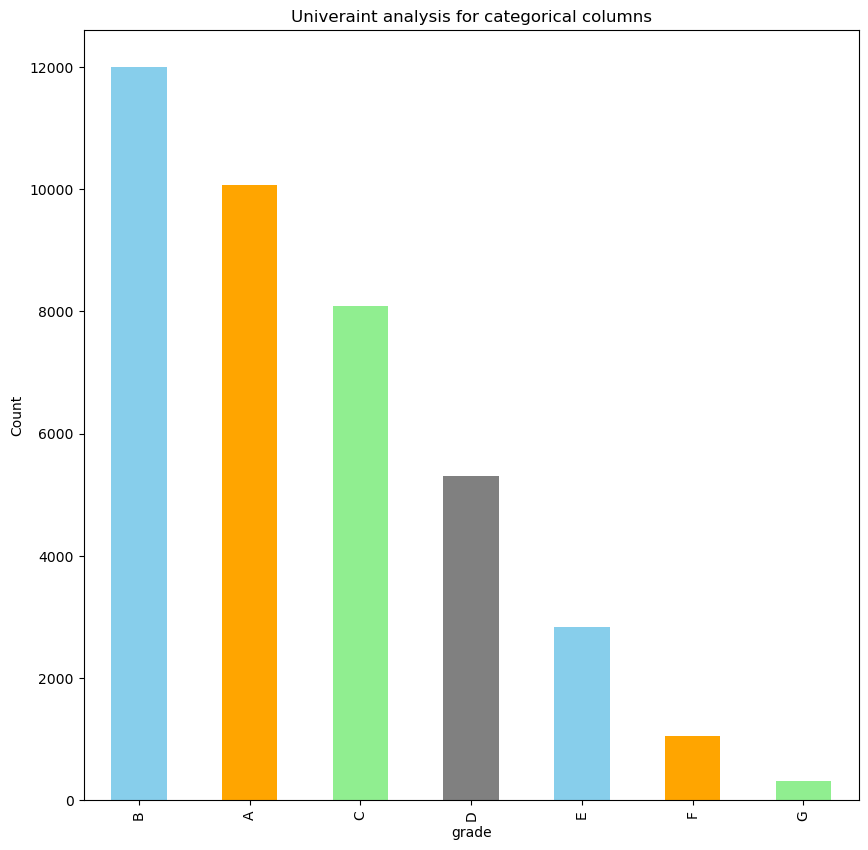

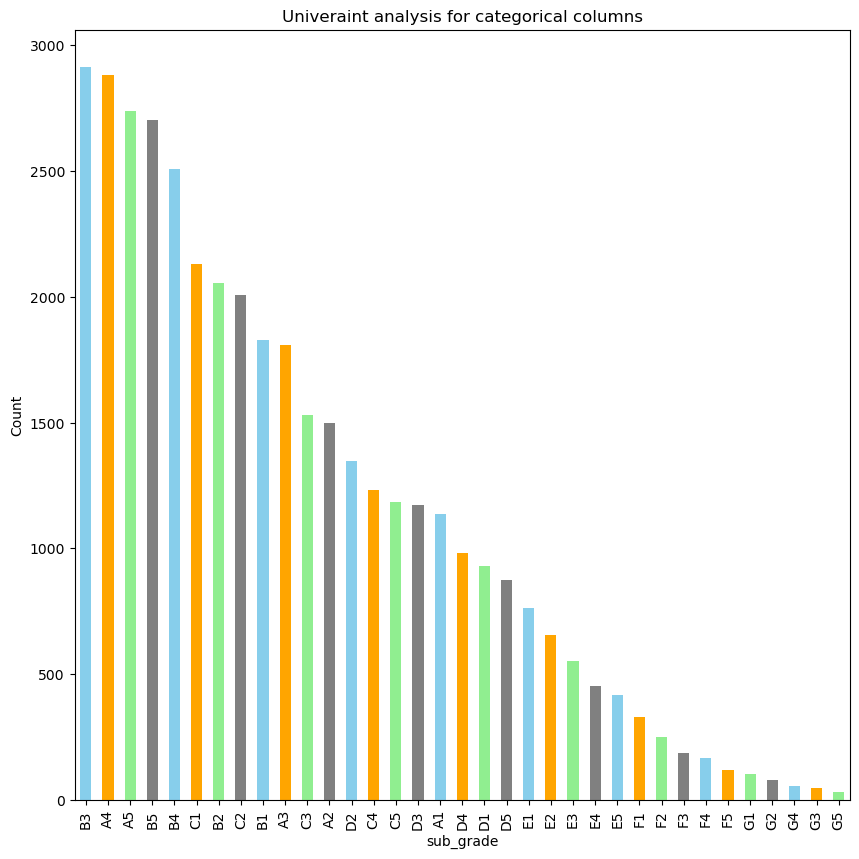

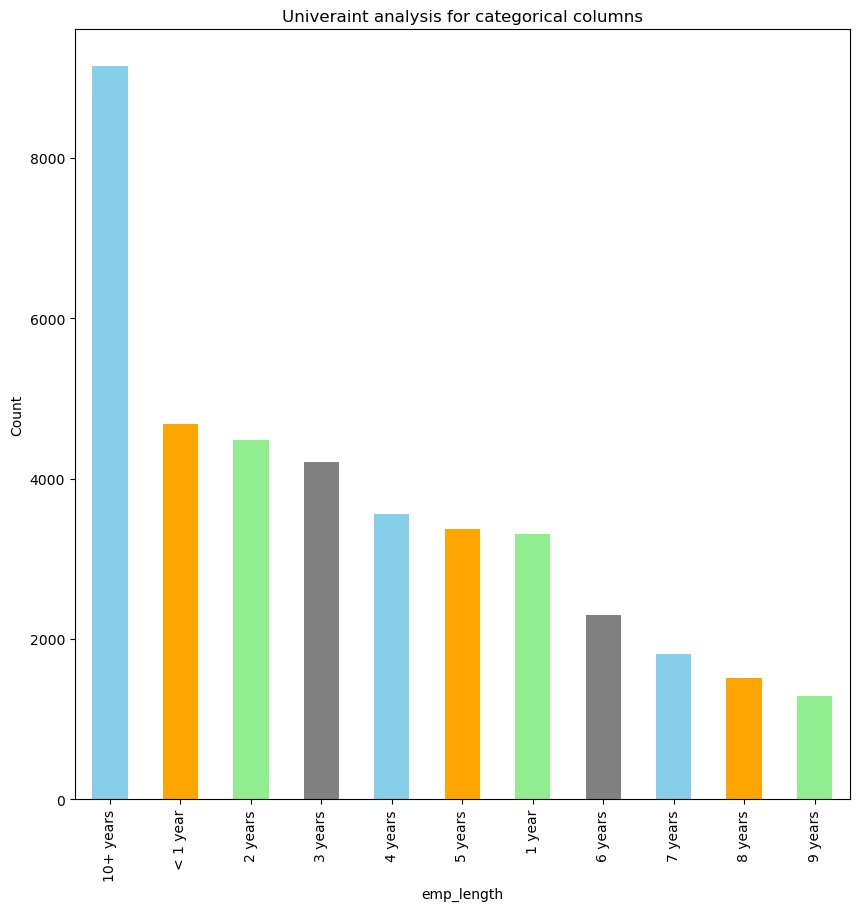

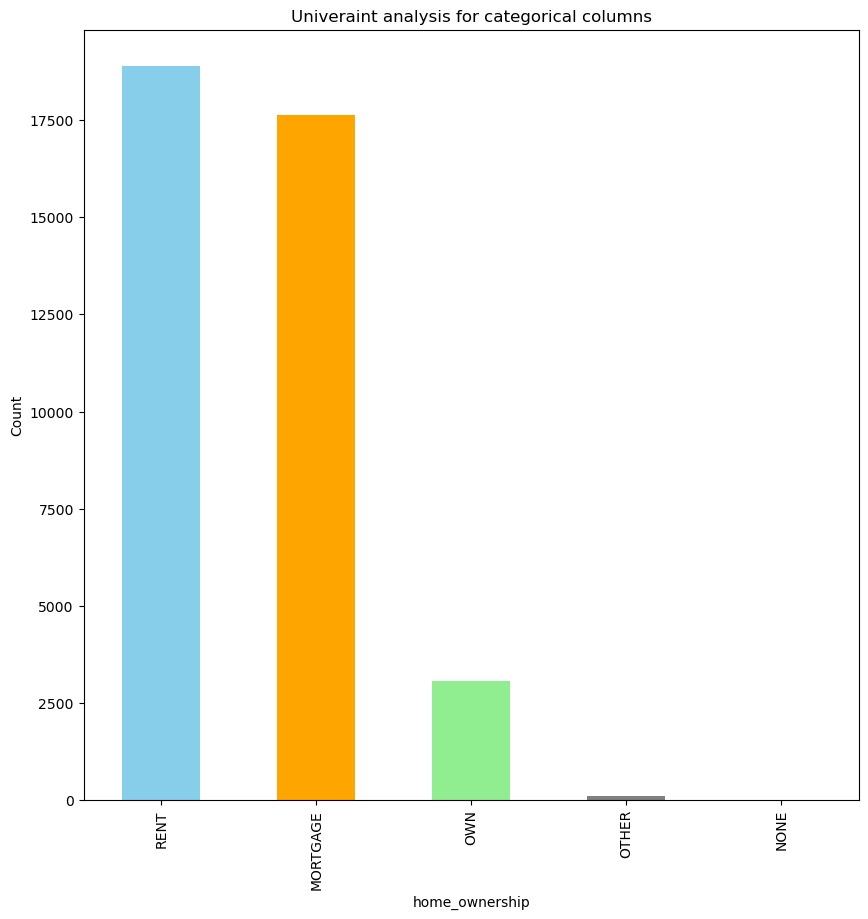

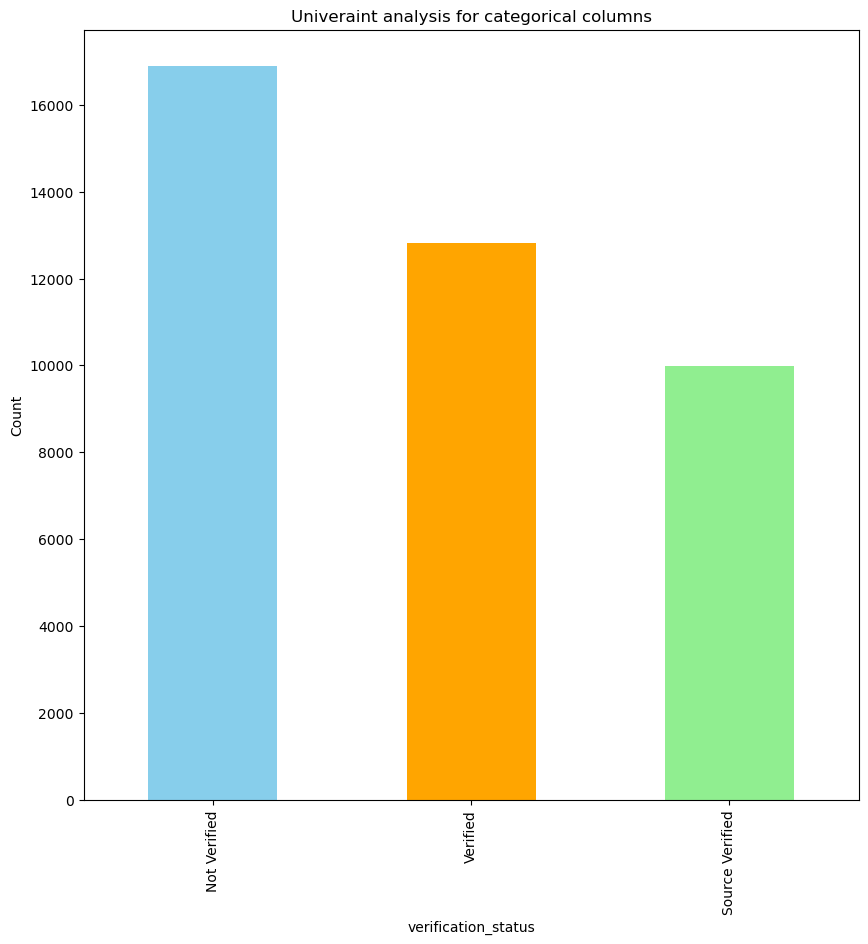

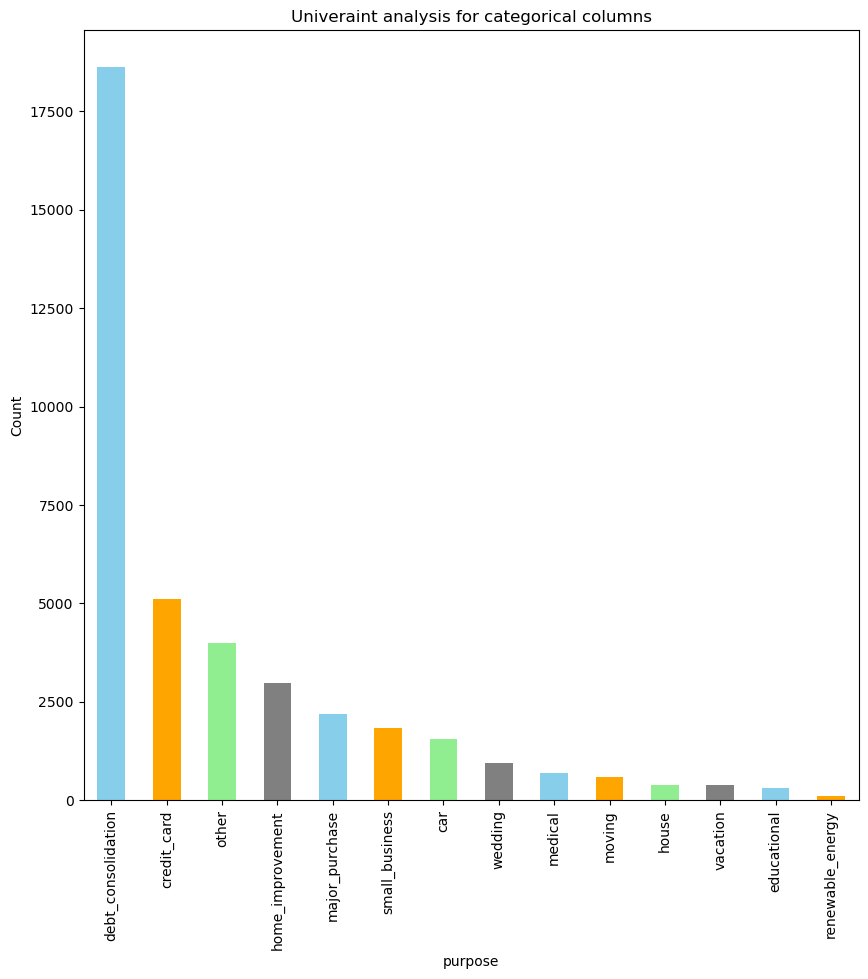

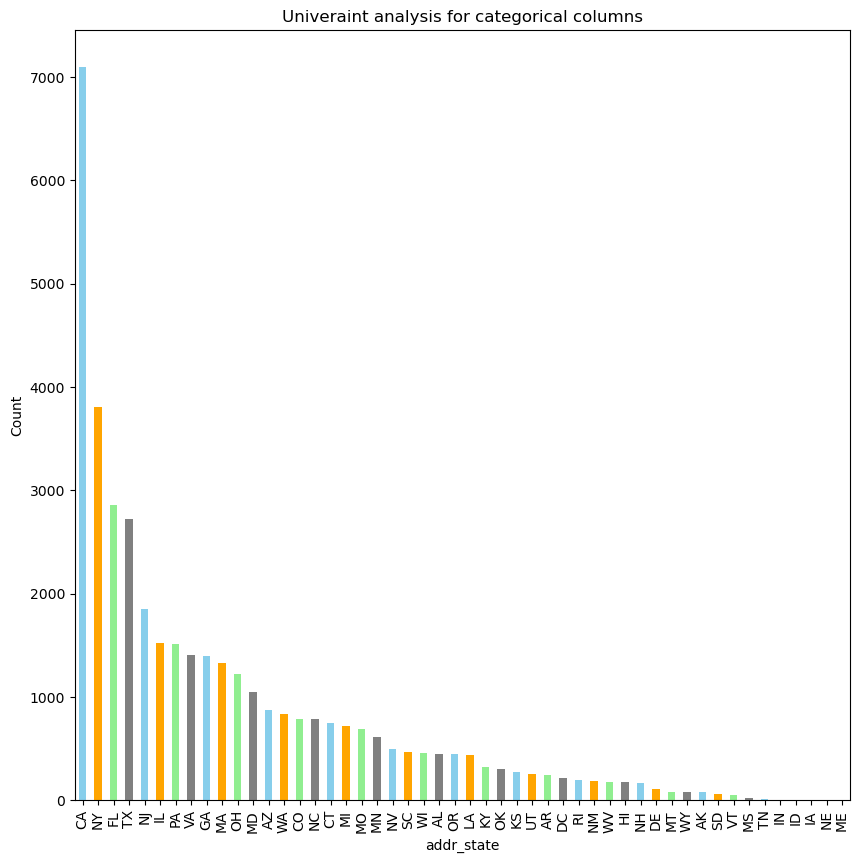

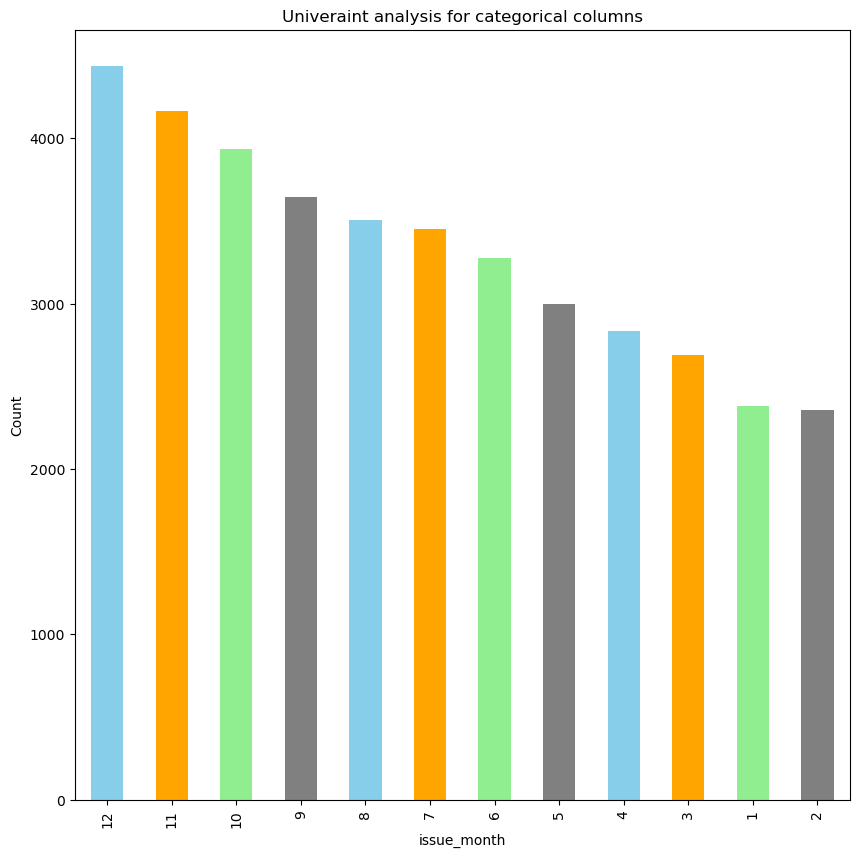

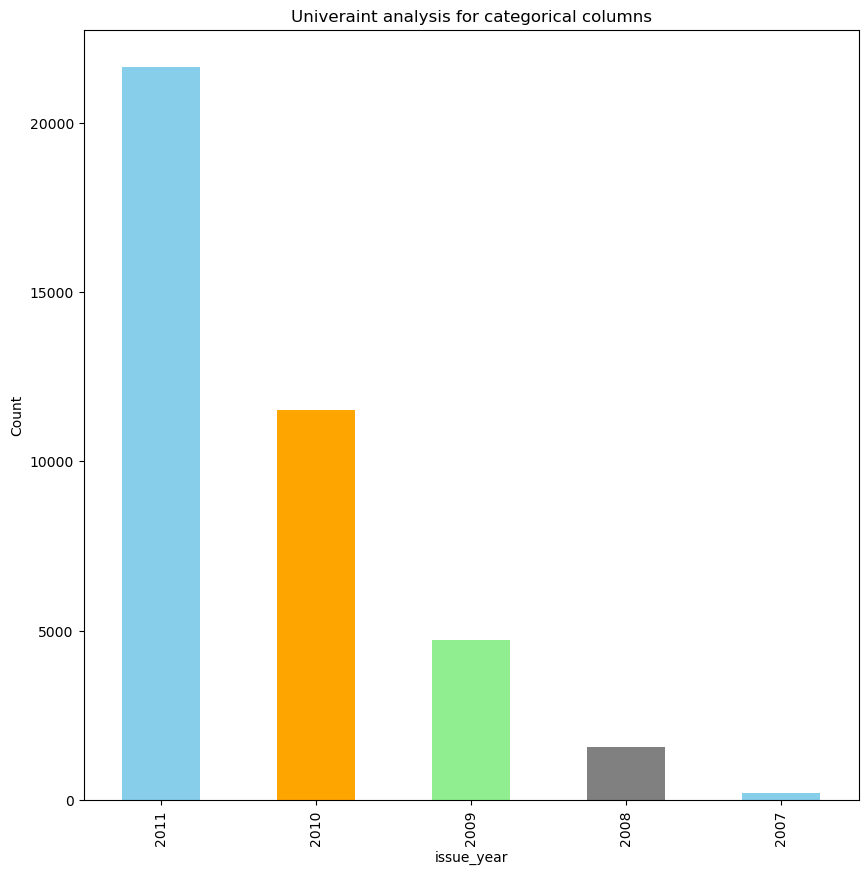

In [643]:
colors = ['skyblue', 'orange', 'lightgreen','grey'] 
for col in df_loan_leandingcasecategorical_columns:
    counts = df_loan_leandingcase2[col].value_counts()
    plt.figure(figsize=(10, 10))
    counts.plot(kind='bar', color=colors)
    # Customize plot
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Univeraint analysis for categorical columns')
    plt.xticks(rotation=90)
    plt.show()

Analysis of categorical columns
1. Maximum borrowers have opted for term 36 months
2. Maximum loans falls under category of A,B,C grades
3. A5,A4,B3 subgrade has the maximum count of borrowers
4. Applicants are either very experienced from employment perspective of frehers in the job, borrowers are mostly above 10+ years of experience or less than 1 years of experience
5. Maximum borrowers have either have home_ownership as 'RENT' or 'MORTAGAGE'. There are very few borrowers who have 'OWN' home
6. For most of the applicant's source of income is not verified
7. Maximum borrowers have taken loans for debt_consolidation
8. Maximum borrowers are from CA --> California
9. 2011 saw maxium count of borrowers, there's increasing trend year by year
10. Borrowers are uniformly distributed across multiple salary ranges maximum being in 80k and above

### Segmented Univariate Analysis

Numeric column vs loan_status: Let us try to understand how loan status is behaving against all the numeric data, and understand if we can find any useful data

Since we are analysing data of borrowers chanrged off and fully paid to get a better understanding of behaviour on vaiours other factors let us remove current data since its of no use 

In [648]:
df_loan_leandingcase_filtered = df_loan_leandingcase2[df_loan_leandingcase2['loan_status']!="Current"]

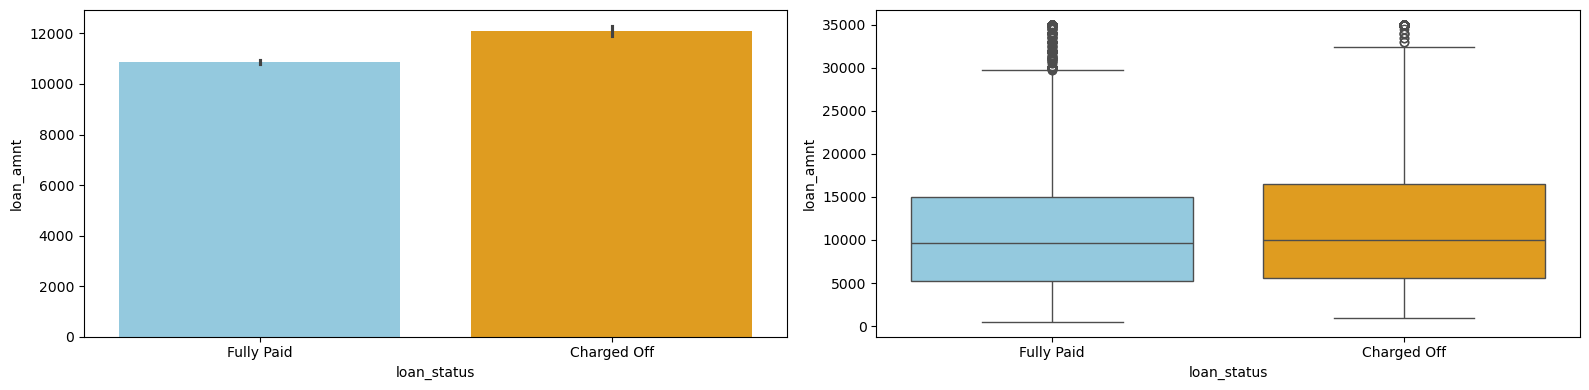

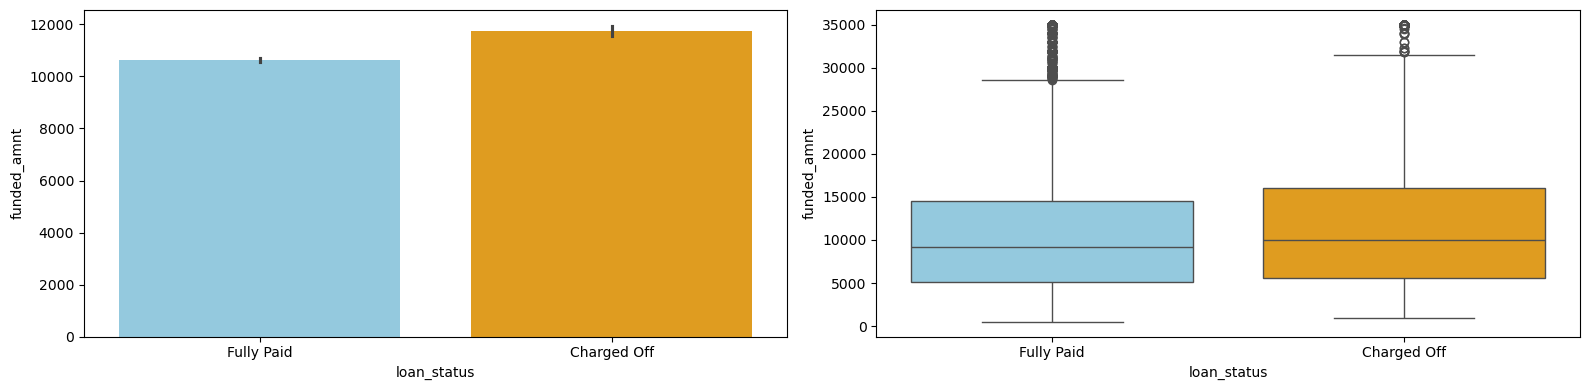

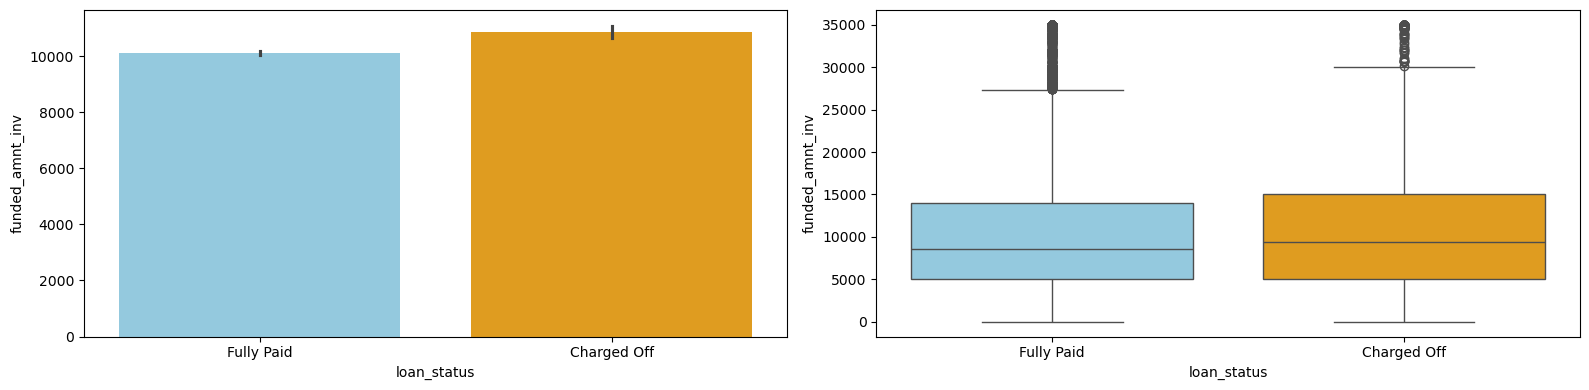

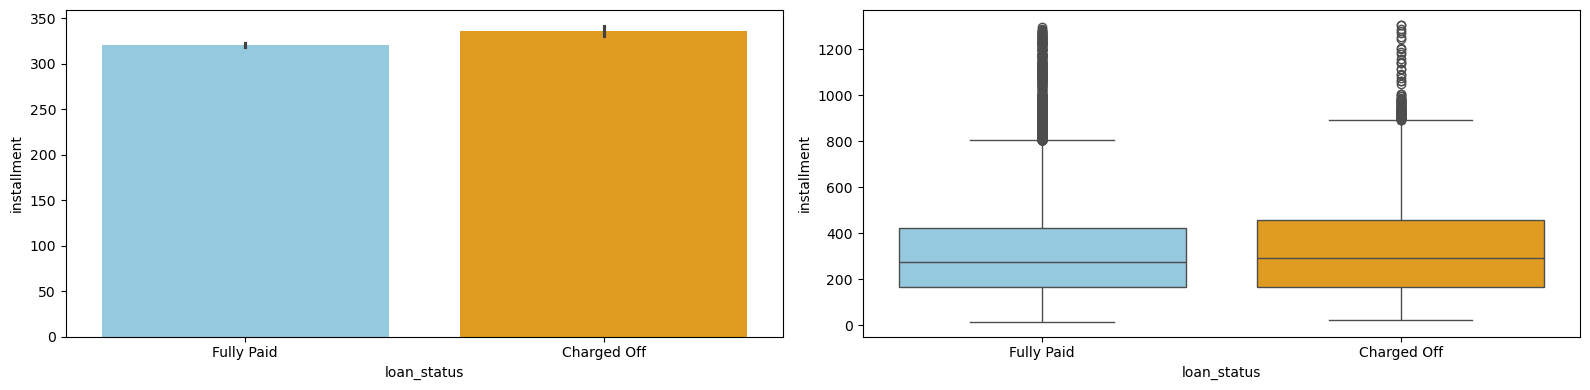

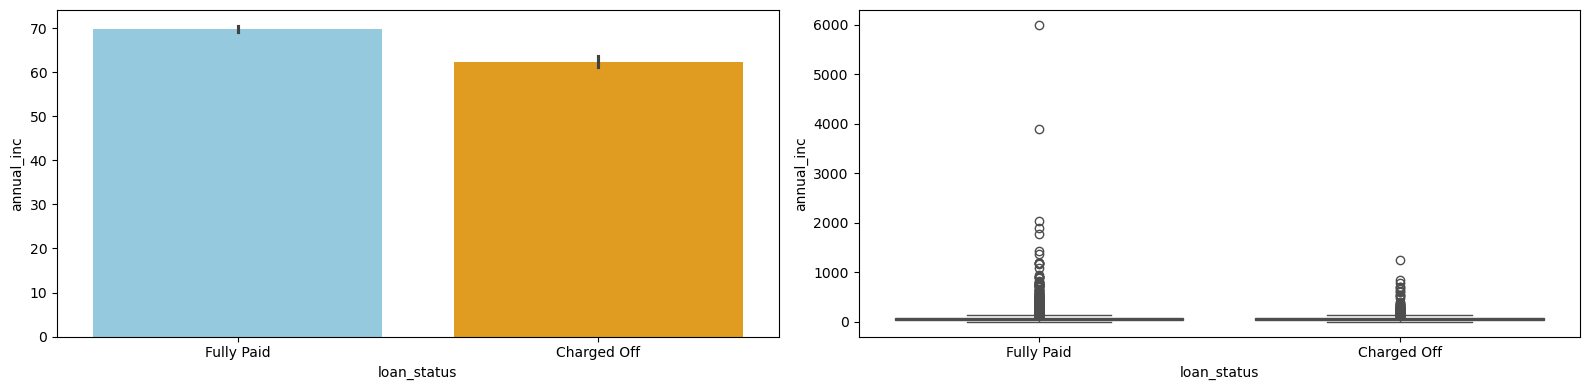

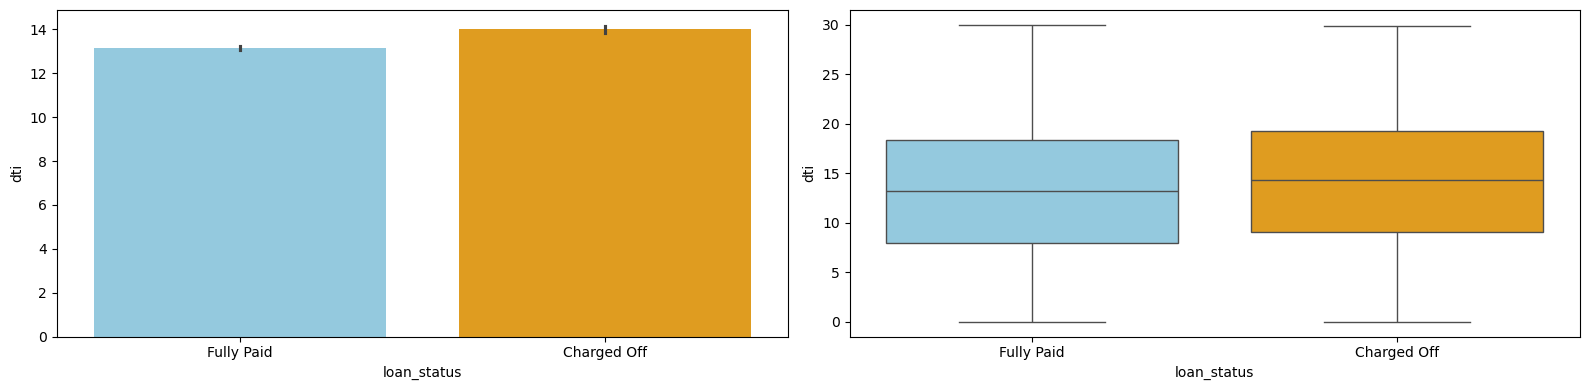

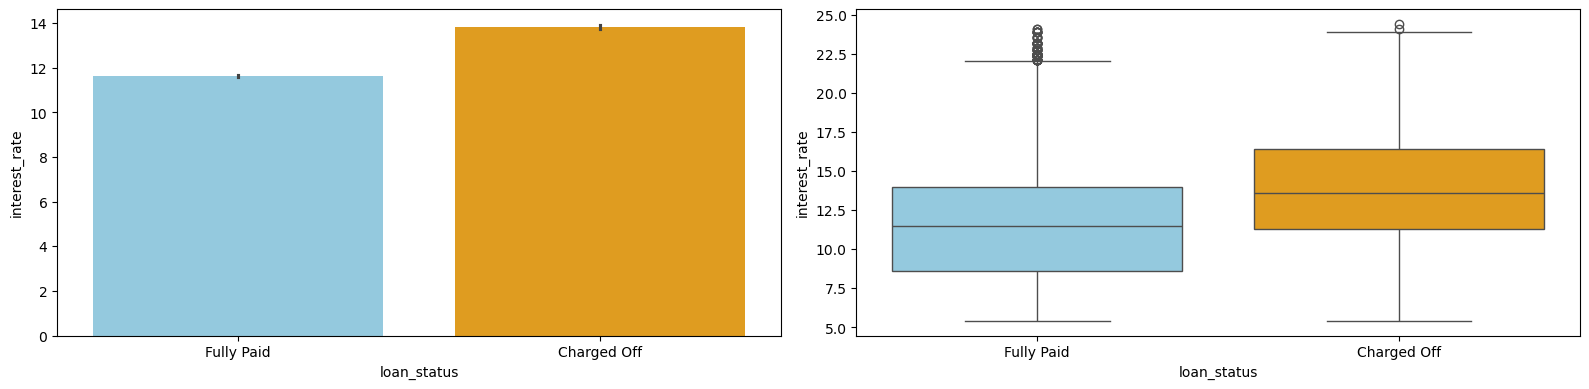

In [649]:
colors = ['red', 'green', 'blue'] 
for col in df_loan_leandingcase_num:
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.barplot(x=df_loan_leandingcase_filtered['loan_status'], y=df_loan_leandingcase_filtered[col], ax=p[0],palette=['skyblue', 'orange', 'blue'])
    sns.boxplot(x=df_loan_leandingcase_filtered['loan_status'], y=df_loan_leandingcase_filtered[col], ax=p[1],palette=['skyblue', 'orange', 'blue'])
    plt.tight_layout()
    plt.show()

### Analysis of Numerical columns post Segmented Univariate analysis
- Dependency of loan_amnt on loan_status is not very significant although borrowers who opted for more loan amount are charged off more
- Dependency of funded_amnt on loan_status is not very significant although borrowers whose funded amount is more are defaulting more
- Dependency of funded_amnt_inv on loan_status is not very significant although borrowers whose funded_amnt_inv is more are defaulting more
- Borrowers with high intallments are defaulting more, again the difference is minimal
- for higher annual_inc loan_status is fully paid again difference is negligible
- For borrowers having loan at high interest_rate  defaulters are more. Loan is usually charged off for borrowers having high interest rate
- Borrowers with higher dti tend to default the payment most.

We also see loan_amt, funded_amt and funded_amt_inv are almost similar, so let us quickly plot a heatmap to understand the correlation among them

<Axes: >

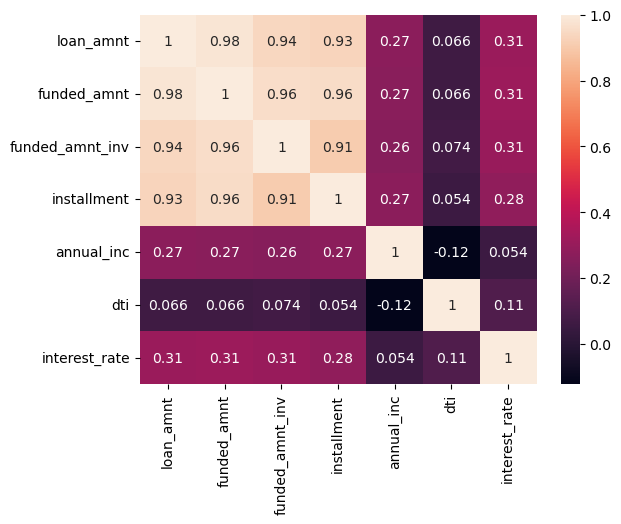

In [652]:
sns.heatmap(df_loan_leandingcase2[df_loan_leandingcase_num].corr(),annot=True)

With the heatmap we can confirm that  loan_amt, funded_amt, funded_amt_inv and installment are having high correlation

### Bivariate Analysis - Categorical columns

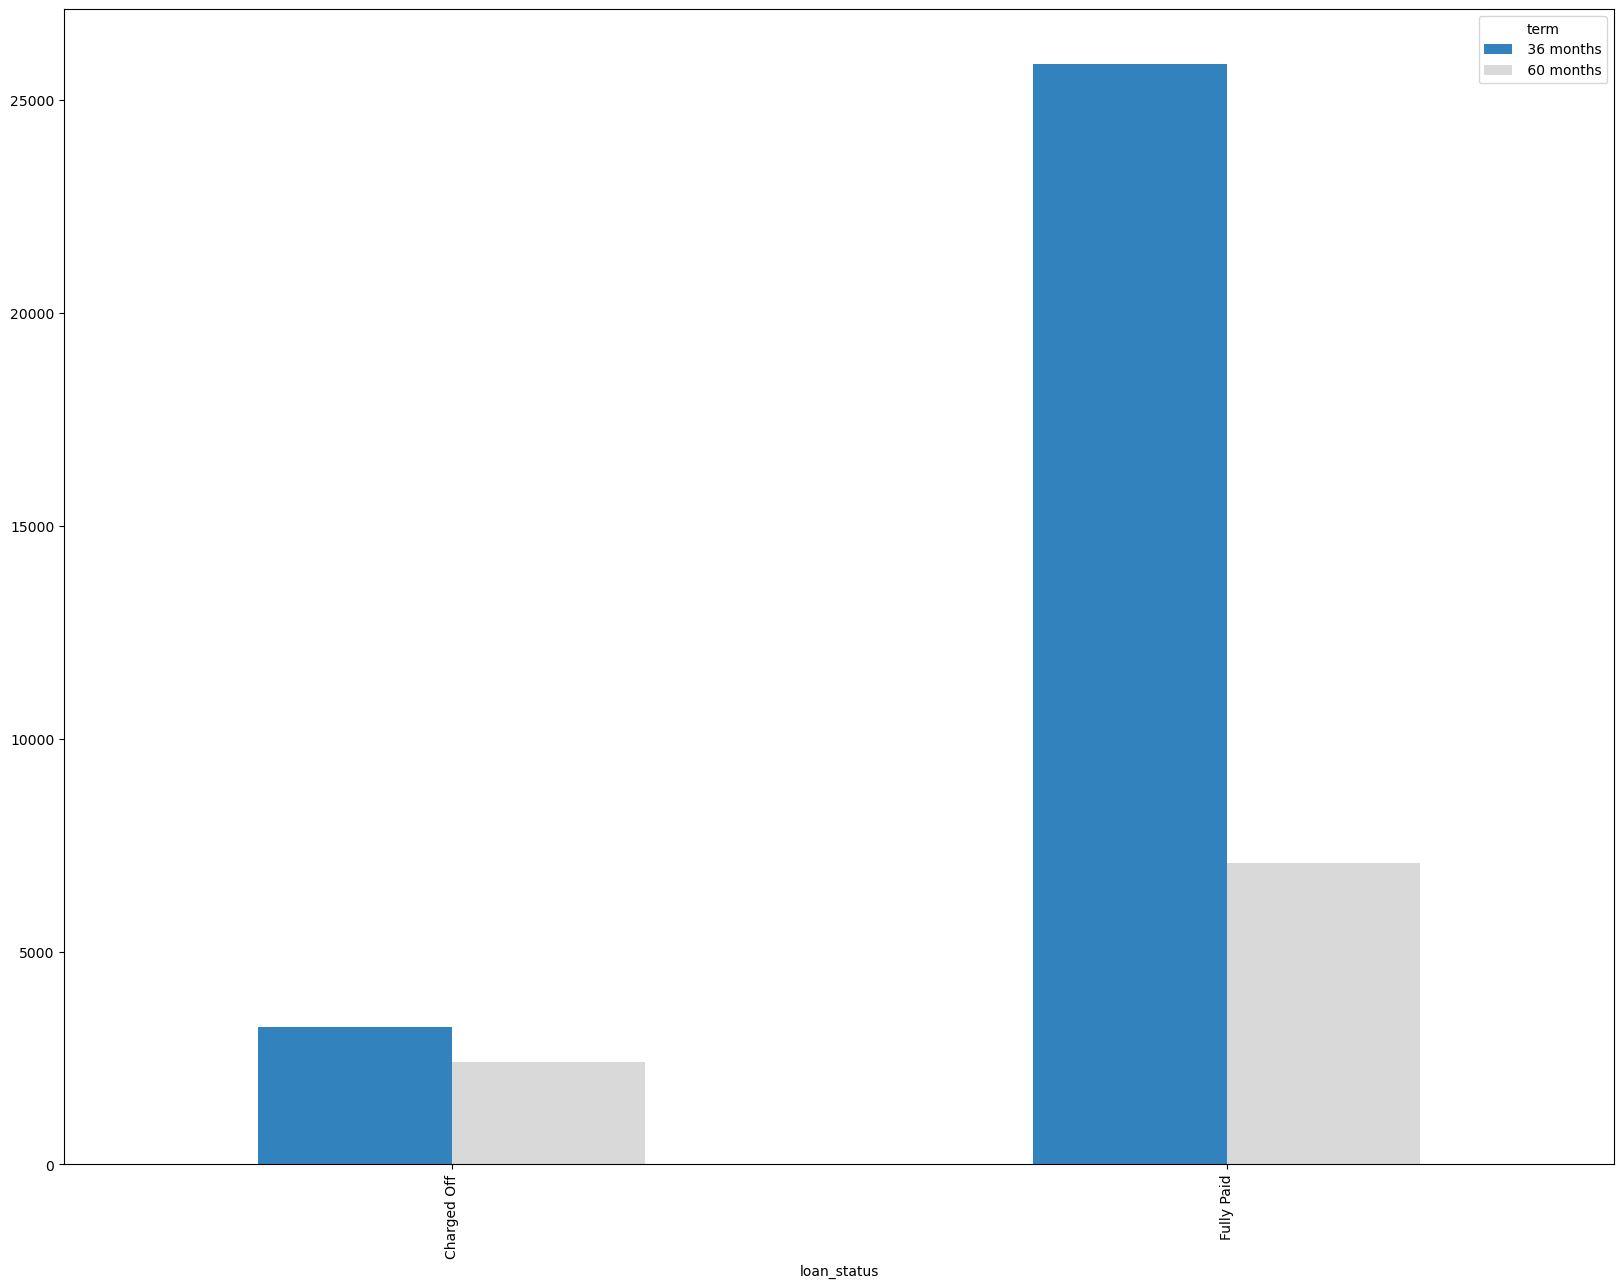

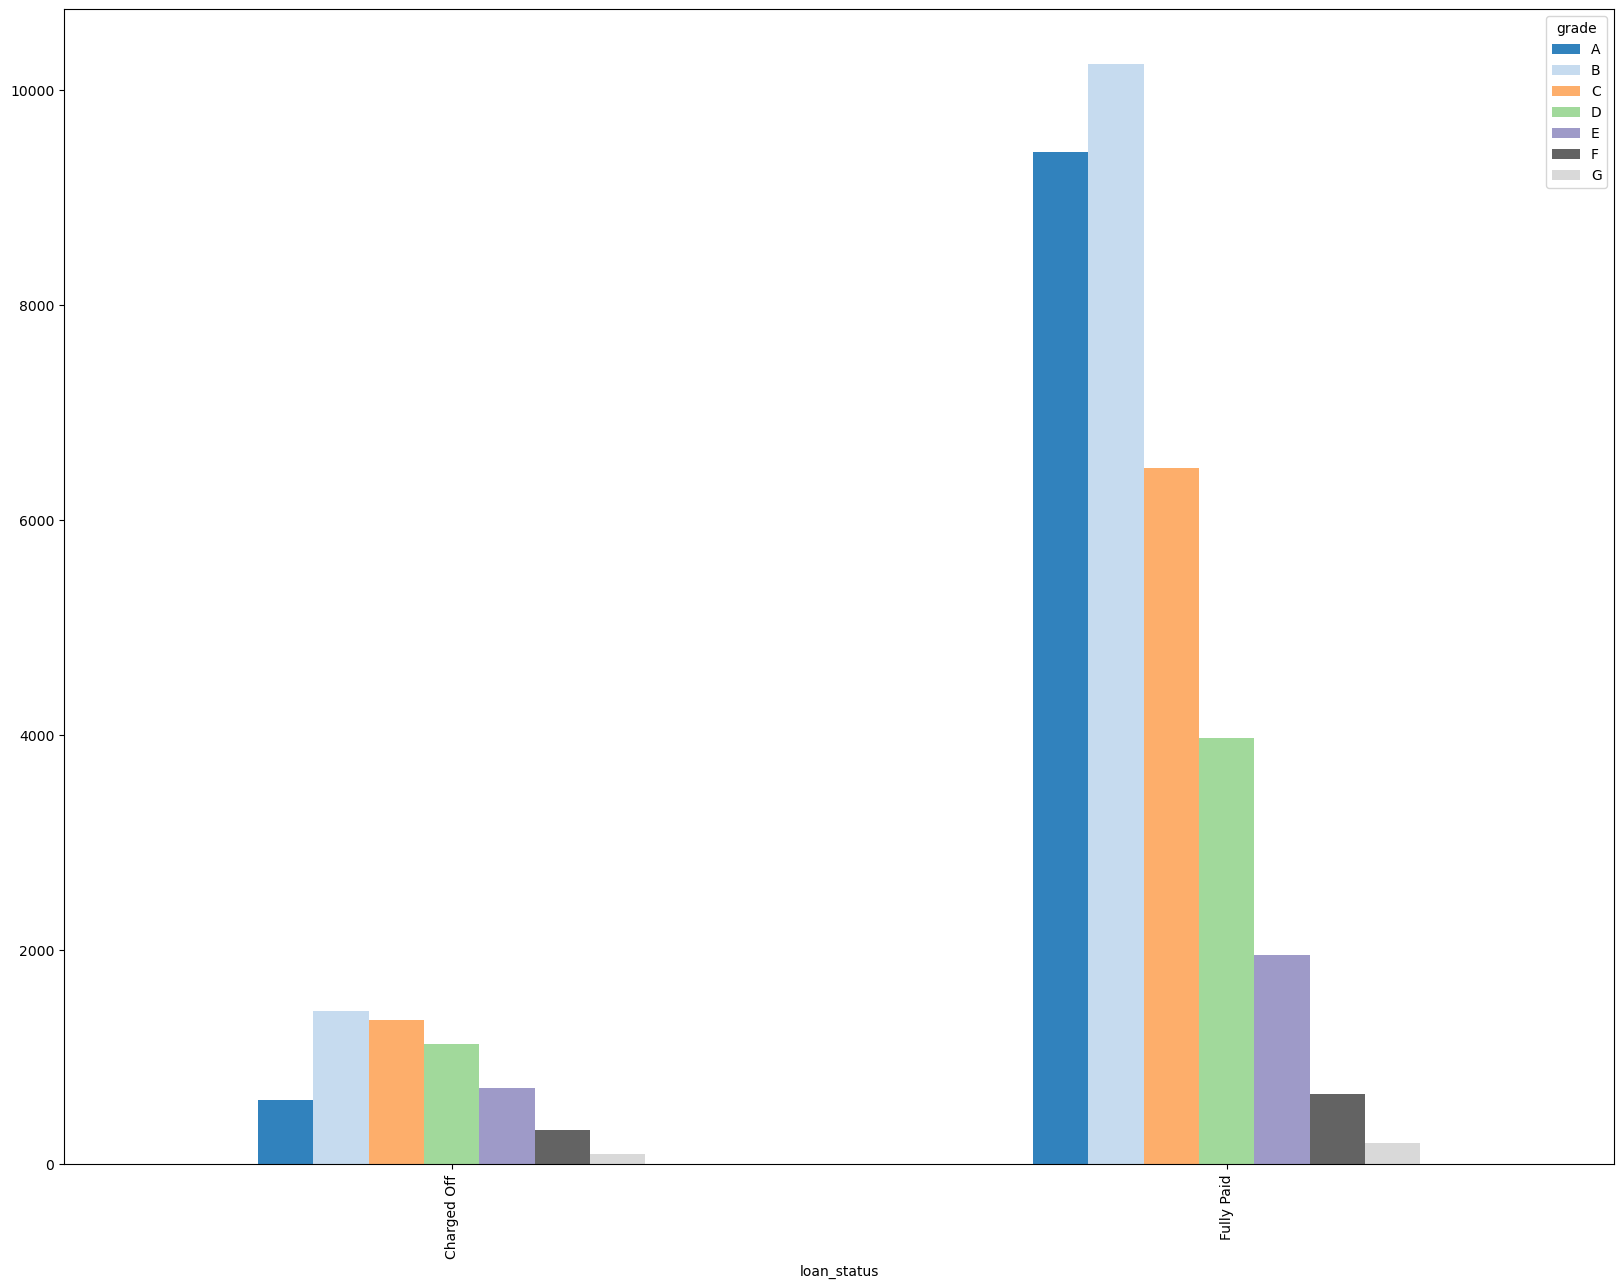

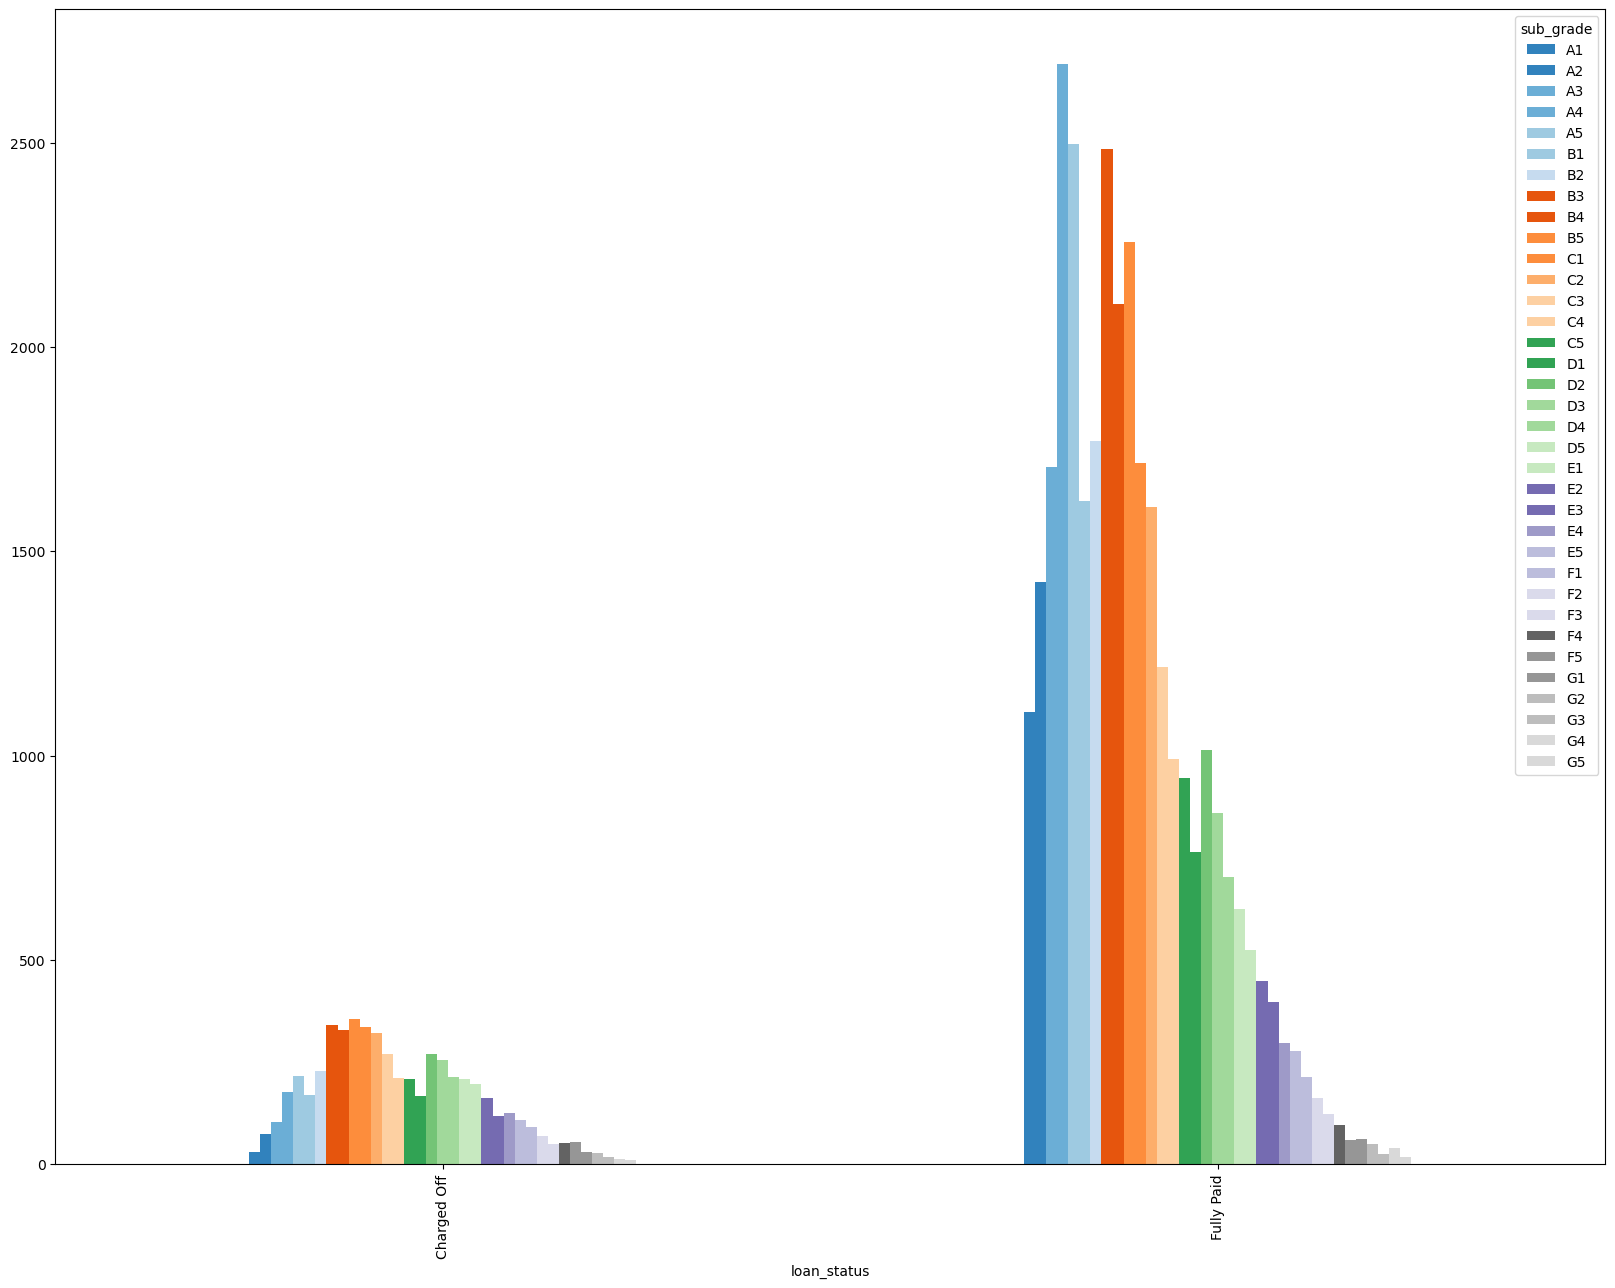

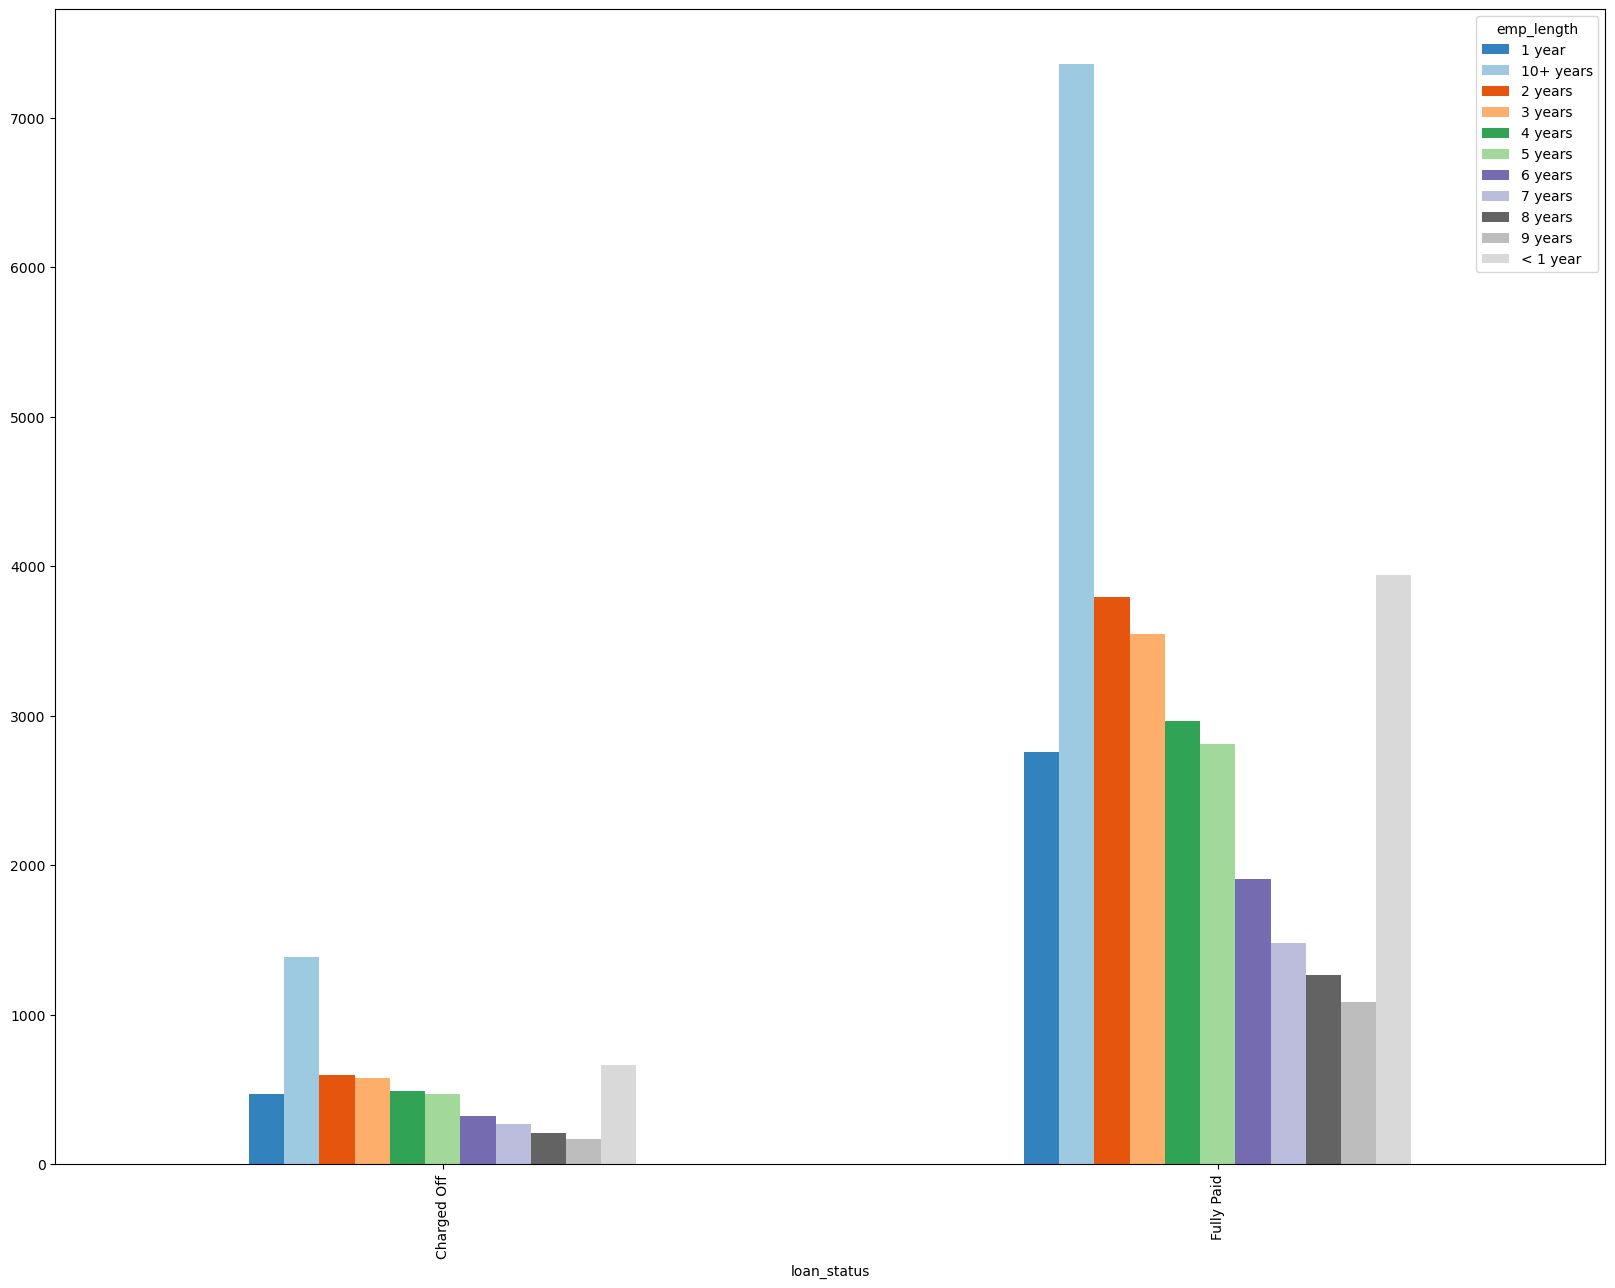

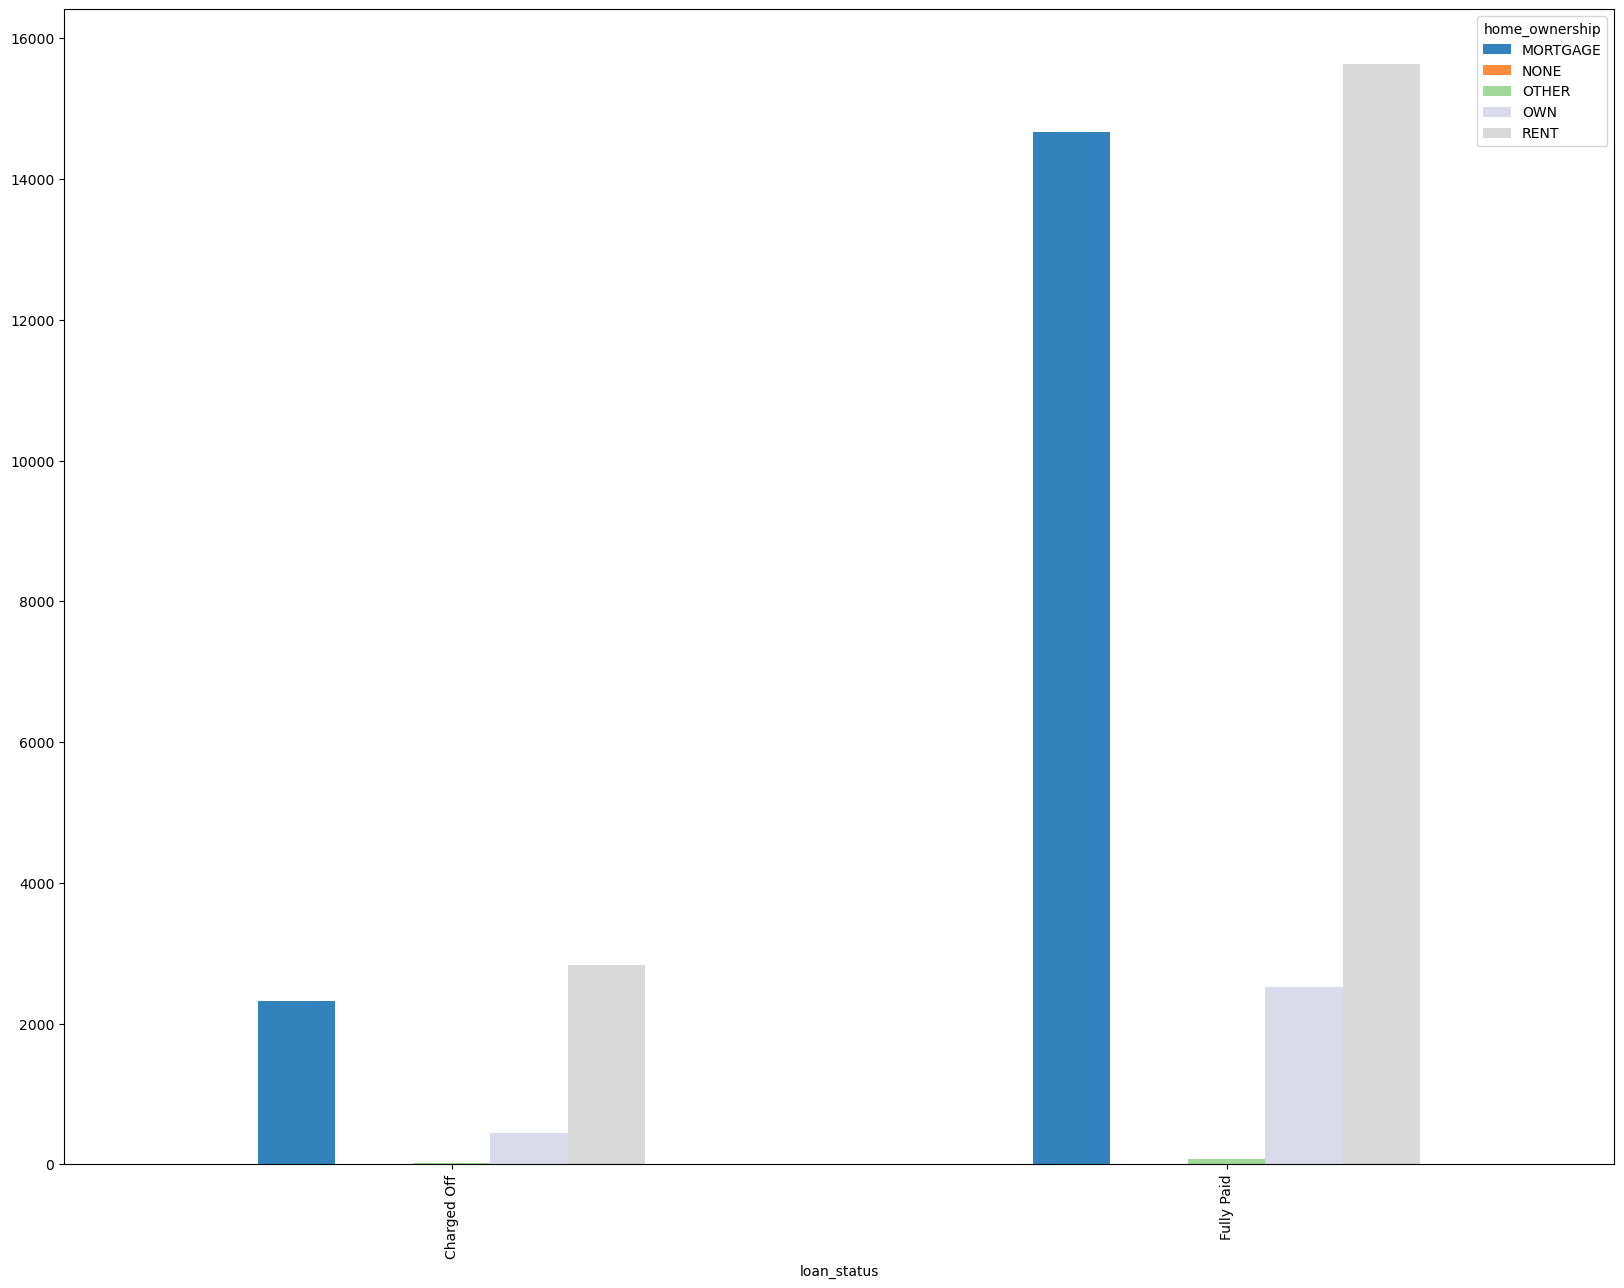

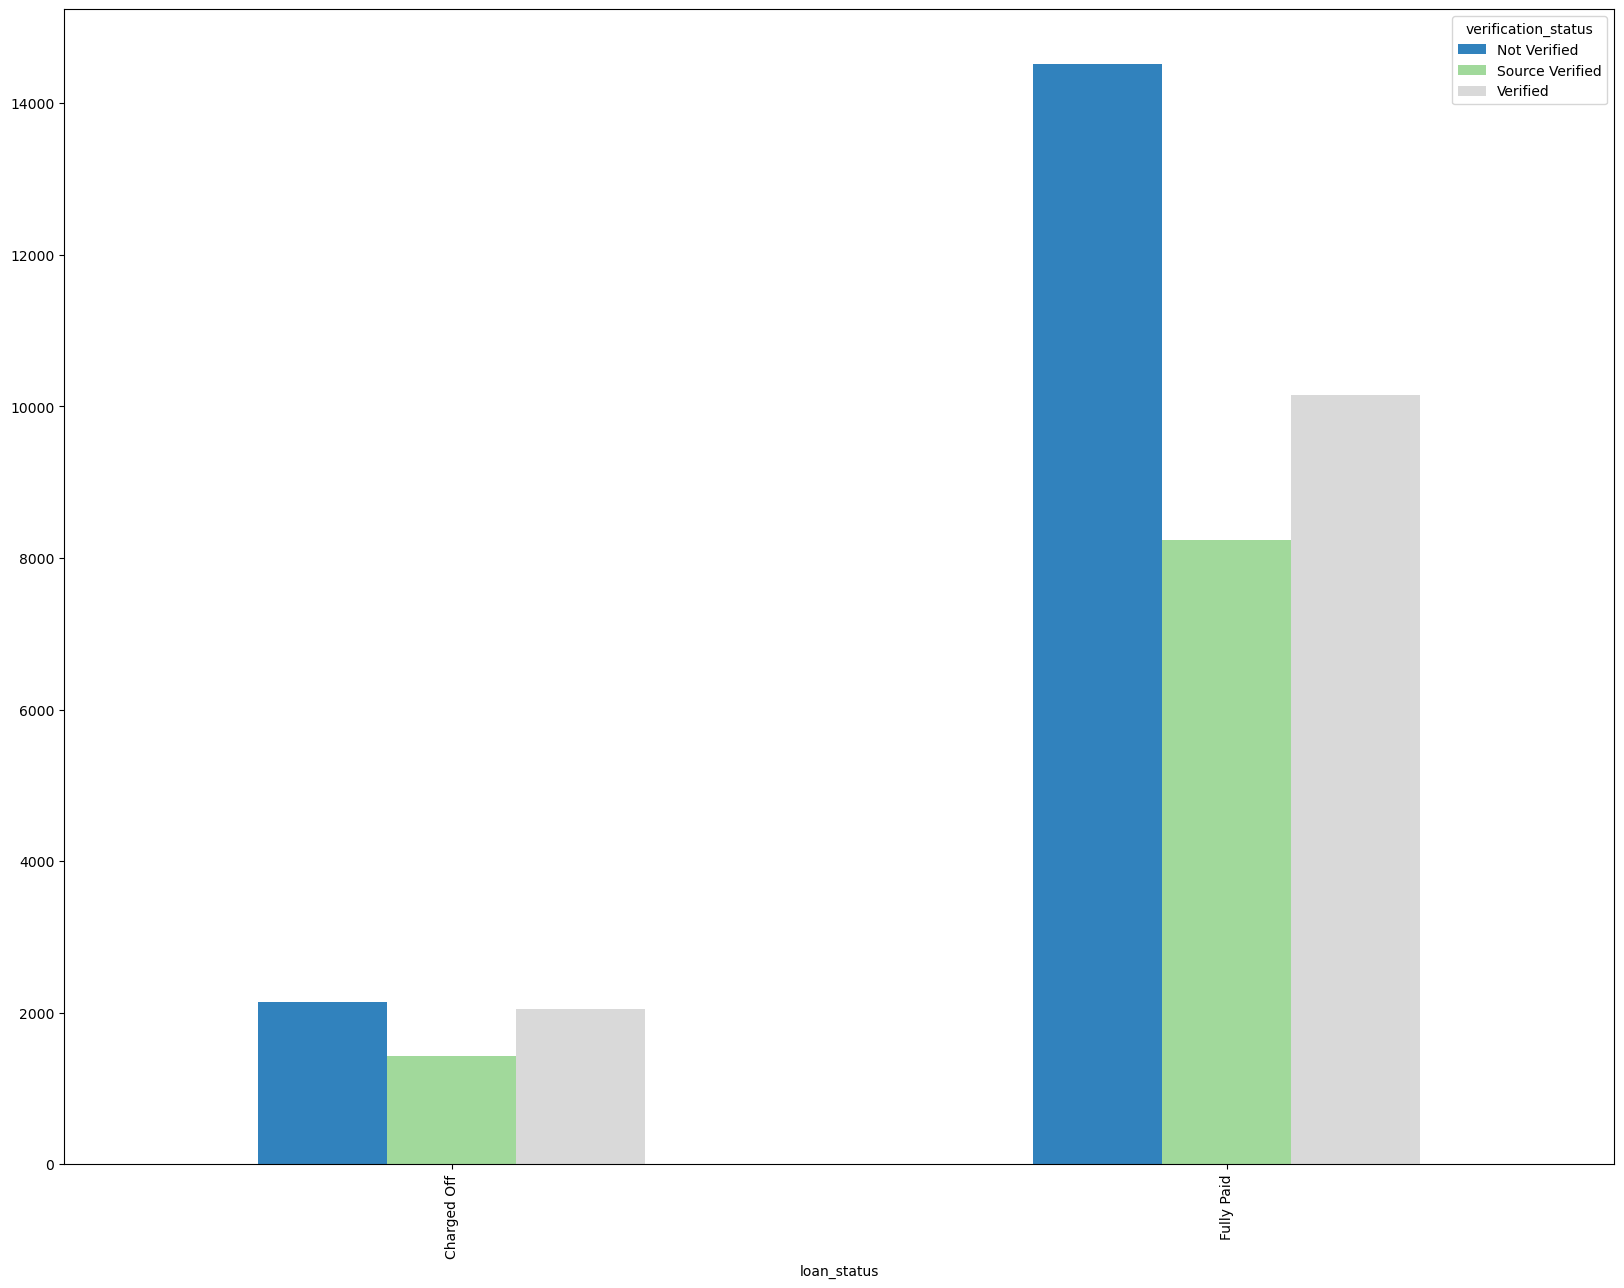

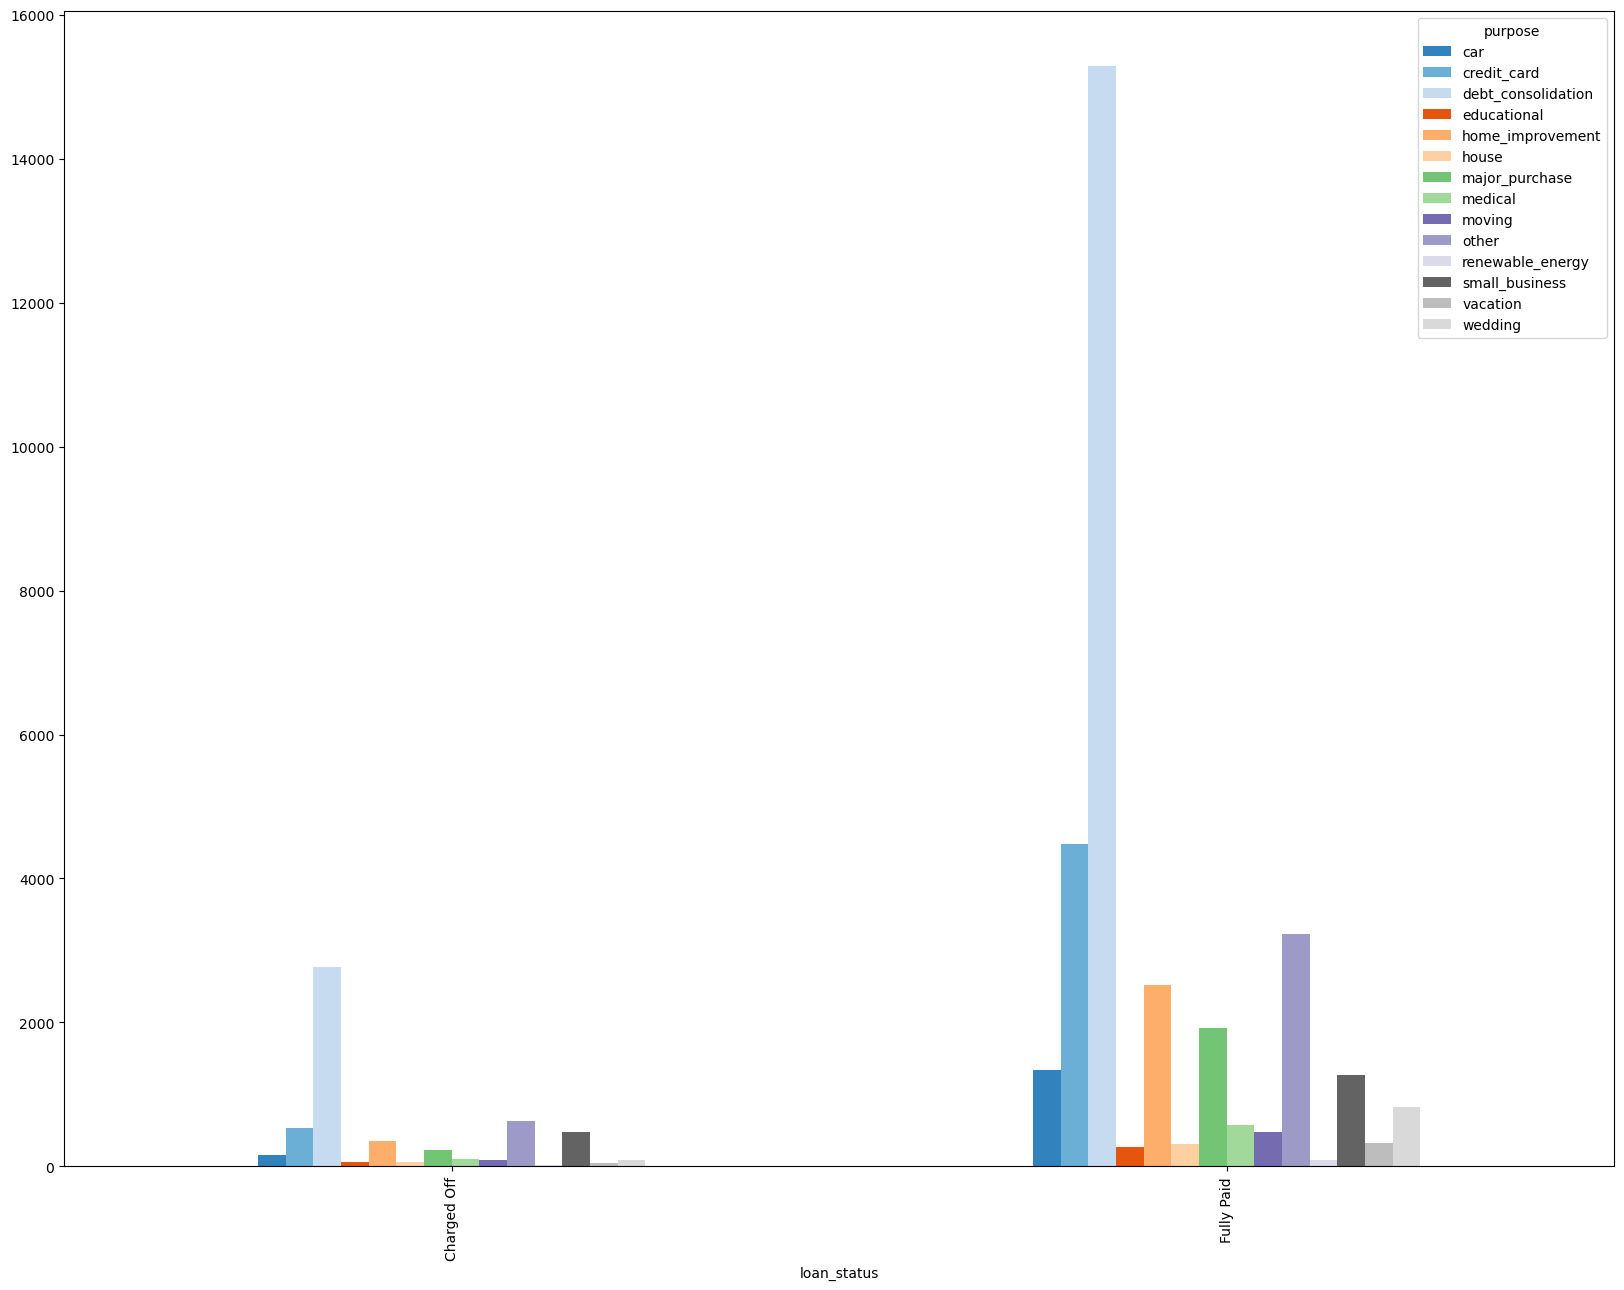

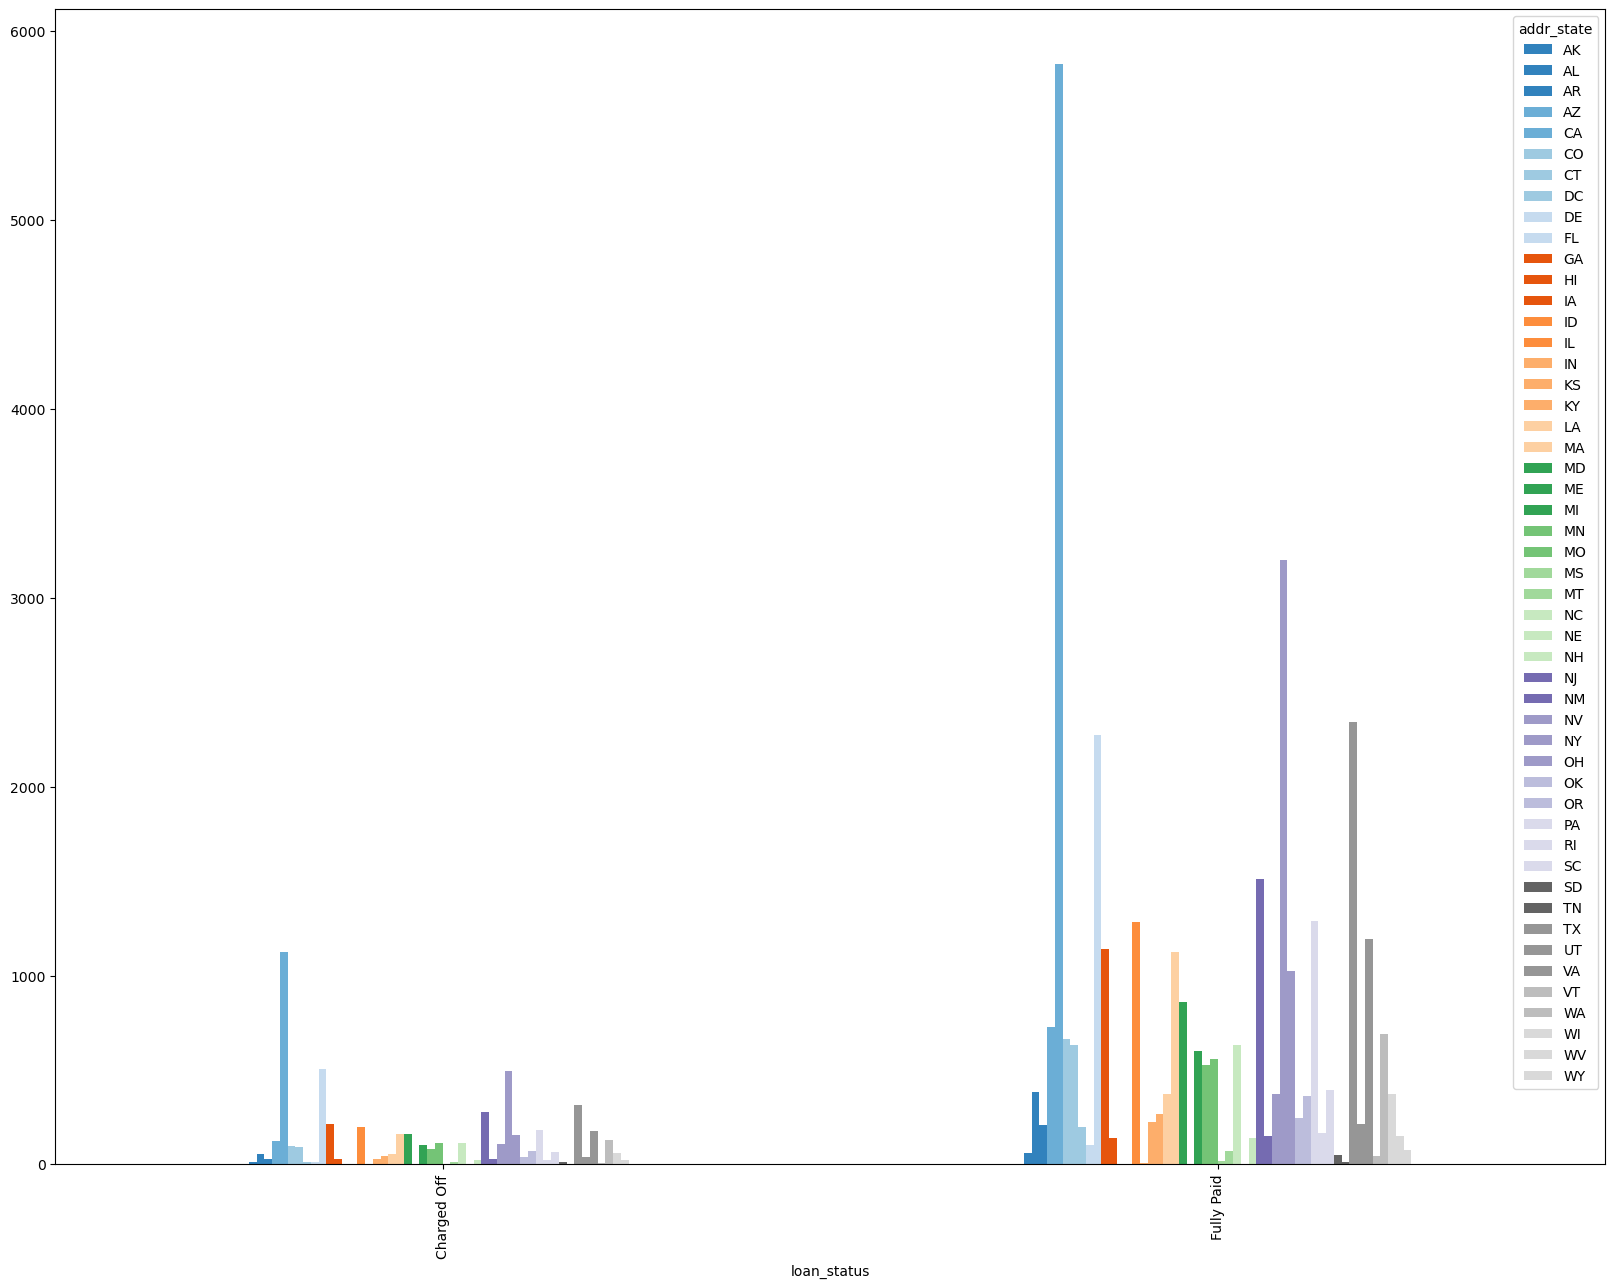

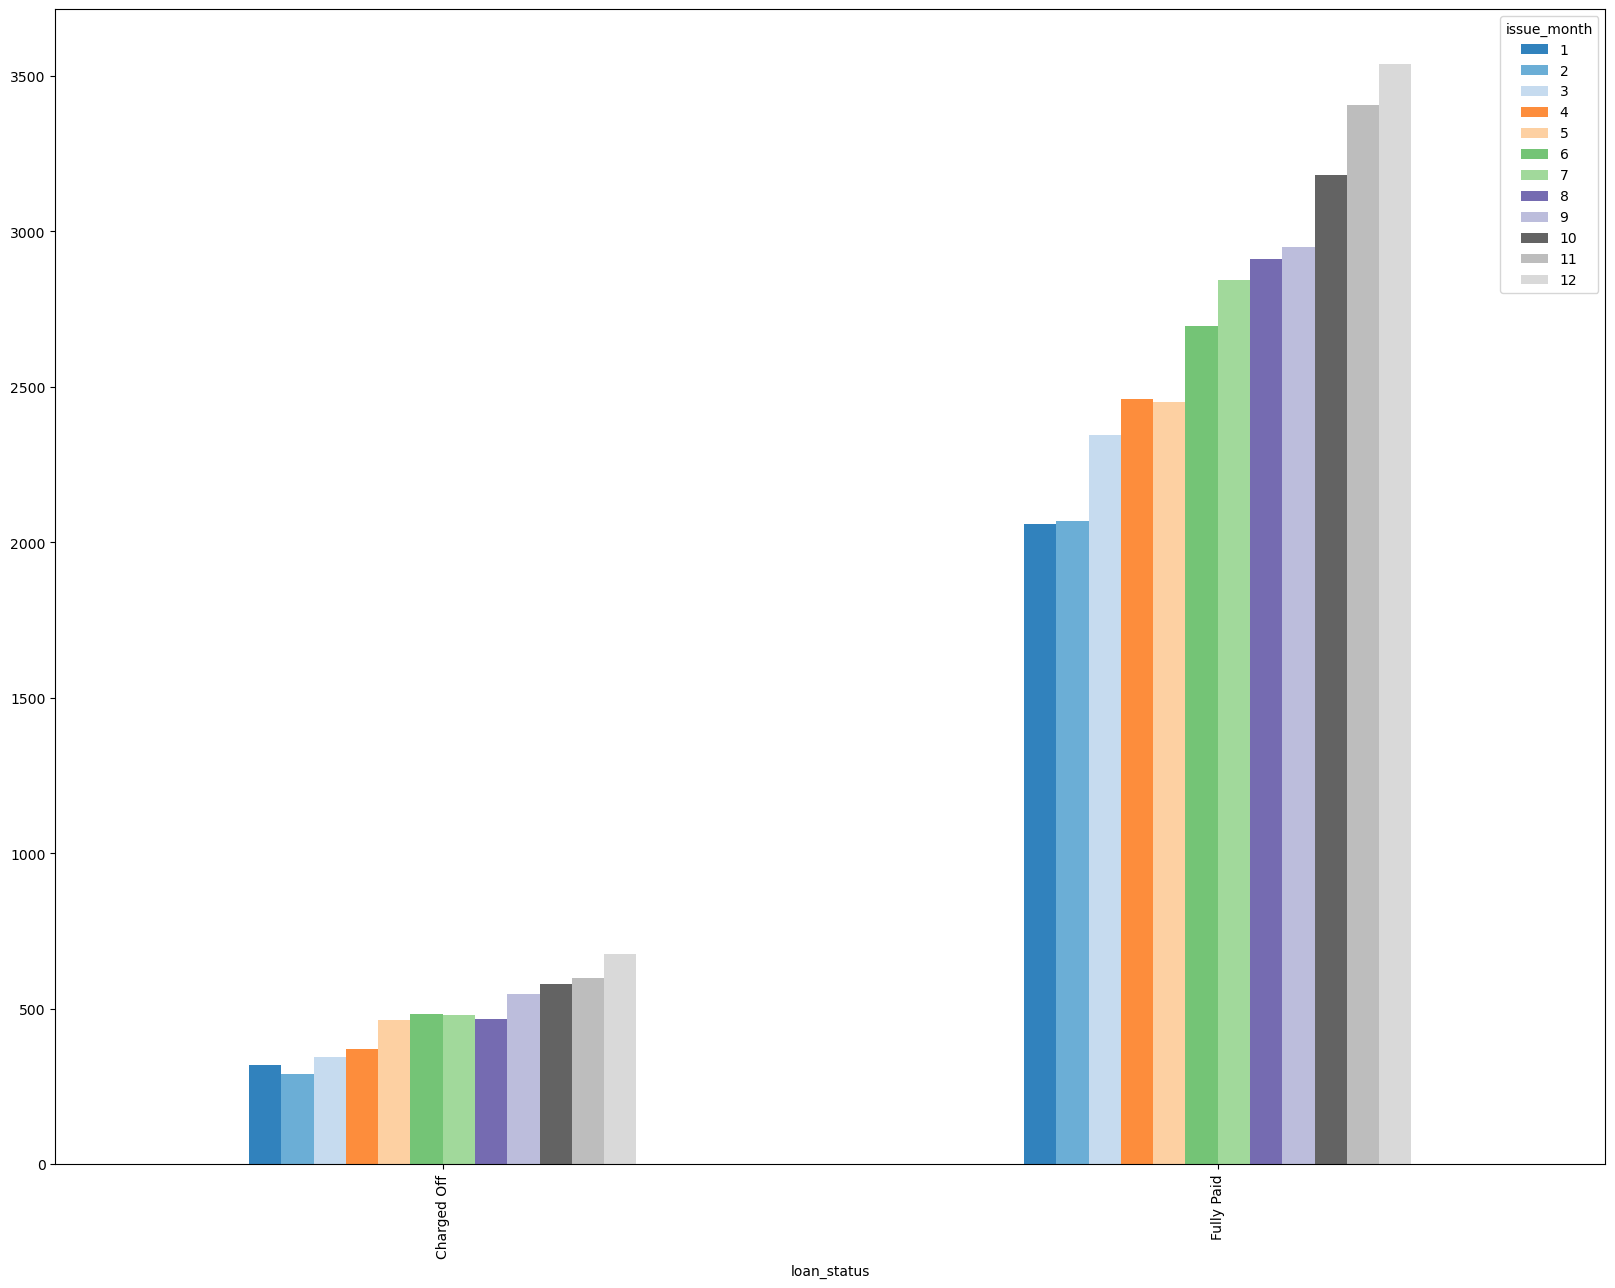

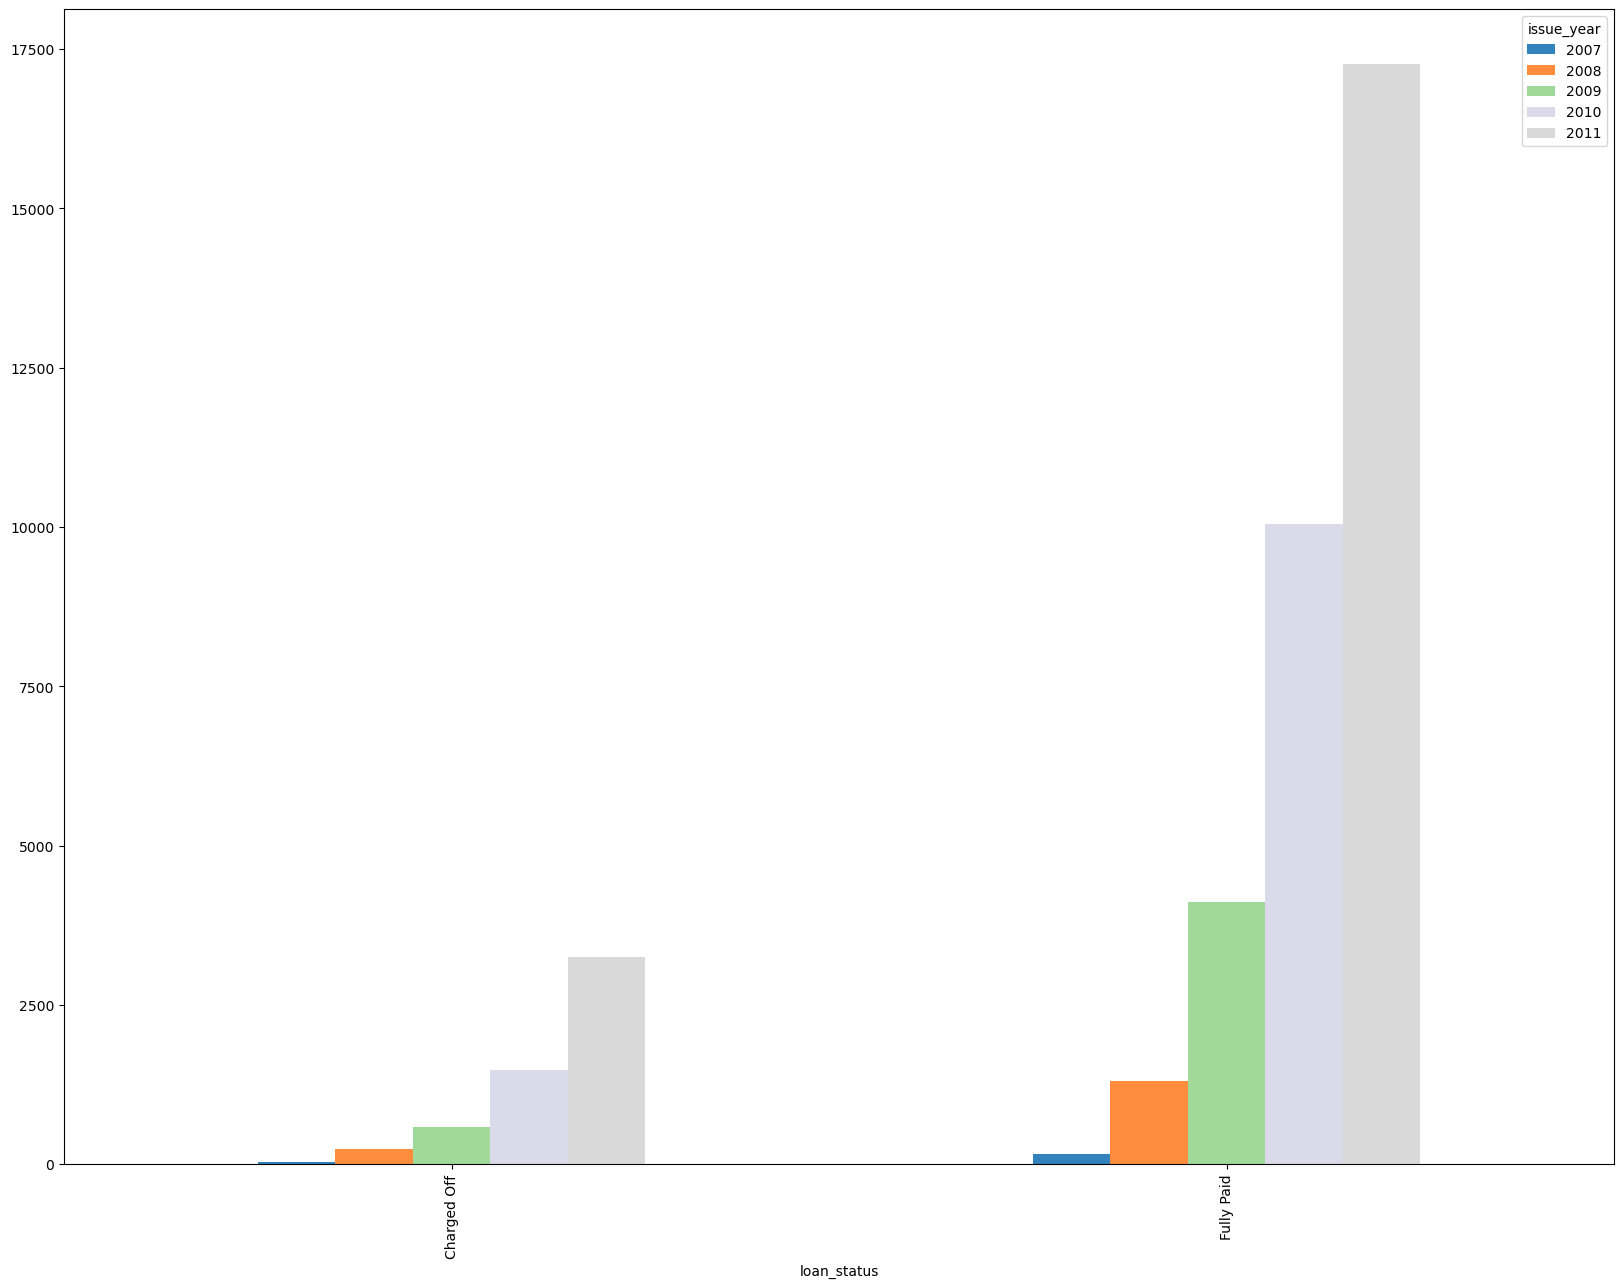

In [712]:
for col in df_loan_leandingcasecategorical_columns:
     ct = pd.crosstab(df_loan_leandingcase_filtered['loan_status'], df_loan_leandingcase2[col])
     ct.plot(kind='bar', stacked=False, colormap='tab20c', figsize=(20, 15))
     plt.show()

### Analysis for Segmented univariate analysis for Catgorical columns
- Brrower with term 36 months are having high in numbers both in Charged off and Fully paid.
- Grade A is high in fully paid and low in charged off, and grade A in charged off is lower than grade C,D adnd E. Which is opposite in Fully paid.
- For Subgrades section we see similar trend like Grades,
- For experience we saw 10years and <1 years having high count, this applies to Fully paid and charged off too.
- From home_ownership persepecive 'RENT' and 'MORTGAGE' have high numbers on both status. And these two categories default the loan most.
-  Purpose: Debt consolidation has the maximum number of defaulters.
-  State: CA (California) has maximum no. of charged_off borrowers and similar way maximum number of fully_paid borrowers,Also on observing the graphs carefully we could see there are good number of defaulters for state NV
-  Year: 2011 has maximum number of charged_off and fully_paid borrowers.
-  Source not verified has maximum number of defaulters.

** Conclusion we observe a pattren with Full paid  and  chagred off, with diffrent category fileds such as term,emp_lenght, home_ownership etc i.e, if we have high count in   Full paid for a filed we happen to have similar in charged off. But for grade category we see diffrent Grade A is high in fully paid and low in charged off and also, grade A in charged off is lower than grade C,D adnd E. Which is opposite in Fully paid.**

### We will understand more on grade category on loan defaulting by writing a pvot table

In [729]:
pivot_table_mean = df_loan_leandingcase_filtered.pivot_table(index='grade', columns='loan_status', values='loan_amnt', aggfunc='mean').reset_index()
from IPython.display import display
display(pivot_table_mean)

loan_status,grade,Charged Off,Fully Paid
0,A,7799.916944,8678.124668
1,B,10905.771930,10945.134277
2,C,11044.469191,10770.477697
3,D,12204.651163,12118.948563
4,E,15844.012605,15624.884378
5,F,19272.570533,17546.189024
6,G,18542.821782,21125.378788


#### From pivot table we can understand people falling under Grade A is performing good with chagred off comapred to anyother grade.

In [735]:
pivot_table_sum = df_loan_leandingcase_filtered.pivot_table(index='purpose', columns='loan_status', values='loan_amnt', aggfunc='sum').reset_index()
from IPython.display import display
display(pivot_table_sum)

loan_status,purpose,Charged Off,Fully Paid
0,car,7264.218750,6684.895444
1,credit_card,13002.033272,11411.130979
2,debt_consolidation,13517.925551,12323.486584
3,educational,7858.928571,6608.239700
4,home_improvement,11913.688761,11240.463918
5,house,12640.254237,12800.407166
6,major_purchase,9135.022523,7950.272303
7,medical,8568.396226,8040.608696
8,moving,5936.141304,6688.716356
9,other,8284.873618,7873.605516


In [ ]:
Conclusion
Considering all the above analysis multiple factors can be taken into account while accepting or rejecting the loan application.
1. Term --> duration of the loan ( lesser the duration lower the chances of defaulters)
2. Interest rate (lesser the interest rate higher the chances of loan repayment)
3. Purpose for which the loan is availed- debt_consolidation,credit_card, home_improvement and small_business are major categories where loss is more.
4. addr_state: Few states like CA (California) and FL (Florida) has high loan defaulters
5. Years of employment
6. annual_inc --> annual income (higher the income higher the chances of repayment)
7. Grades: Loan grade A, B have higher chances of repayment and C,D,E,F,G grades have maximum defaulters.
8. verification_status: We observe that defaulters are more ratio wise in case of 'Verified'and 'Source Verified' compared to 'Not Verified'. So we can conclude income verification or income source verification does not gurantee us if the loan will be repaid
9. loan_amnt: Higher the loan higher the chances of loan default